# <img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_scores_path = 'sat_scores.csv'
with open(sat_scores_path, 'r') as f:
    reader = csv.reader(f)
    sat_scores_list = list(reader)
sat_scores_list[:5]

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505']]

In [3]:
def satscores_dict_create(csv_list):
    header = csv_list[0]
    data = csv_list[1:]
            
    sat_scores_dict = {}
    for j in range(len(header)):
        sat_scores_inner = []
        for row in data:
            sat_scores_inner.append(row[j])
        sat_scores_dict[header[j]] = sat_scores_inner
 
    return sat_scores_dict

print(satscores_dict_create(sat_scores_list))

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
# pd.df made with the SAT dictionary
print(pd.DataFrame(satscores_dict_create(sat_scores_list)).head())
pd.DataFrame(satscores_dict_create(sat_scores_list)).dtypes

  State Rate Verbal Math
0    CT   82    509  510
1    NJ   81    499  513
2    MA   79    511  515
3    NY   77    495  505
4    NH   72    520  516


State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [5]:
# pd.df made with pandas .read_csv()
sats = pd.read_csv(sat_scores_path)
print(sats.head())
sats.dtypes

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516


State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
sats.head()
# Rate could mean Participation Rate: ie. what %students were sent by states to take the SATs
# Verbal could mean state's average score for Verbal SAT
# Math could mean state's average score for Math SAT

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [7]:
sats_desc = ['state', 'sat_participation_rate', 'average_verbal_score', 'average_math_score']
attributes = {'type':sats.dtypes, 'desc':sats_desc}
    
def make_data_dict(sats):

    sats_data_dict = {}
    
    for i in range(len(sats.columns)):
        sats_data_dict_inner = {}
        for k,v in attributes.items():
            sats_data_dict_inner[k] = v[i]
        sats_data_dict[sats.columns[i]] = sats_data_dict_inner
    
    sats_data_dict['d.shape'] = sats.shape
    
    pprint(sats_data_dict)

make_data_dict(sats)

{'Math': {'desc': 'average_math_score', 'type': dtype('int64')},
 'Rate': {'desc': 'sat_participation_rate', 'type': dtype('int64')},
 'State': {'desc': 'state', 'type': dtype('O')},
 'Verbal': {'desc': 'average_verbal_score', 'type': dtype('int64')},
 'd.shape': (52, 4)}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

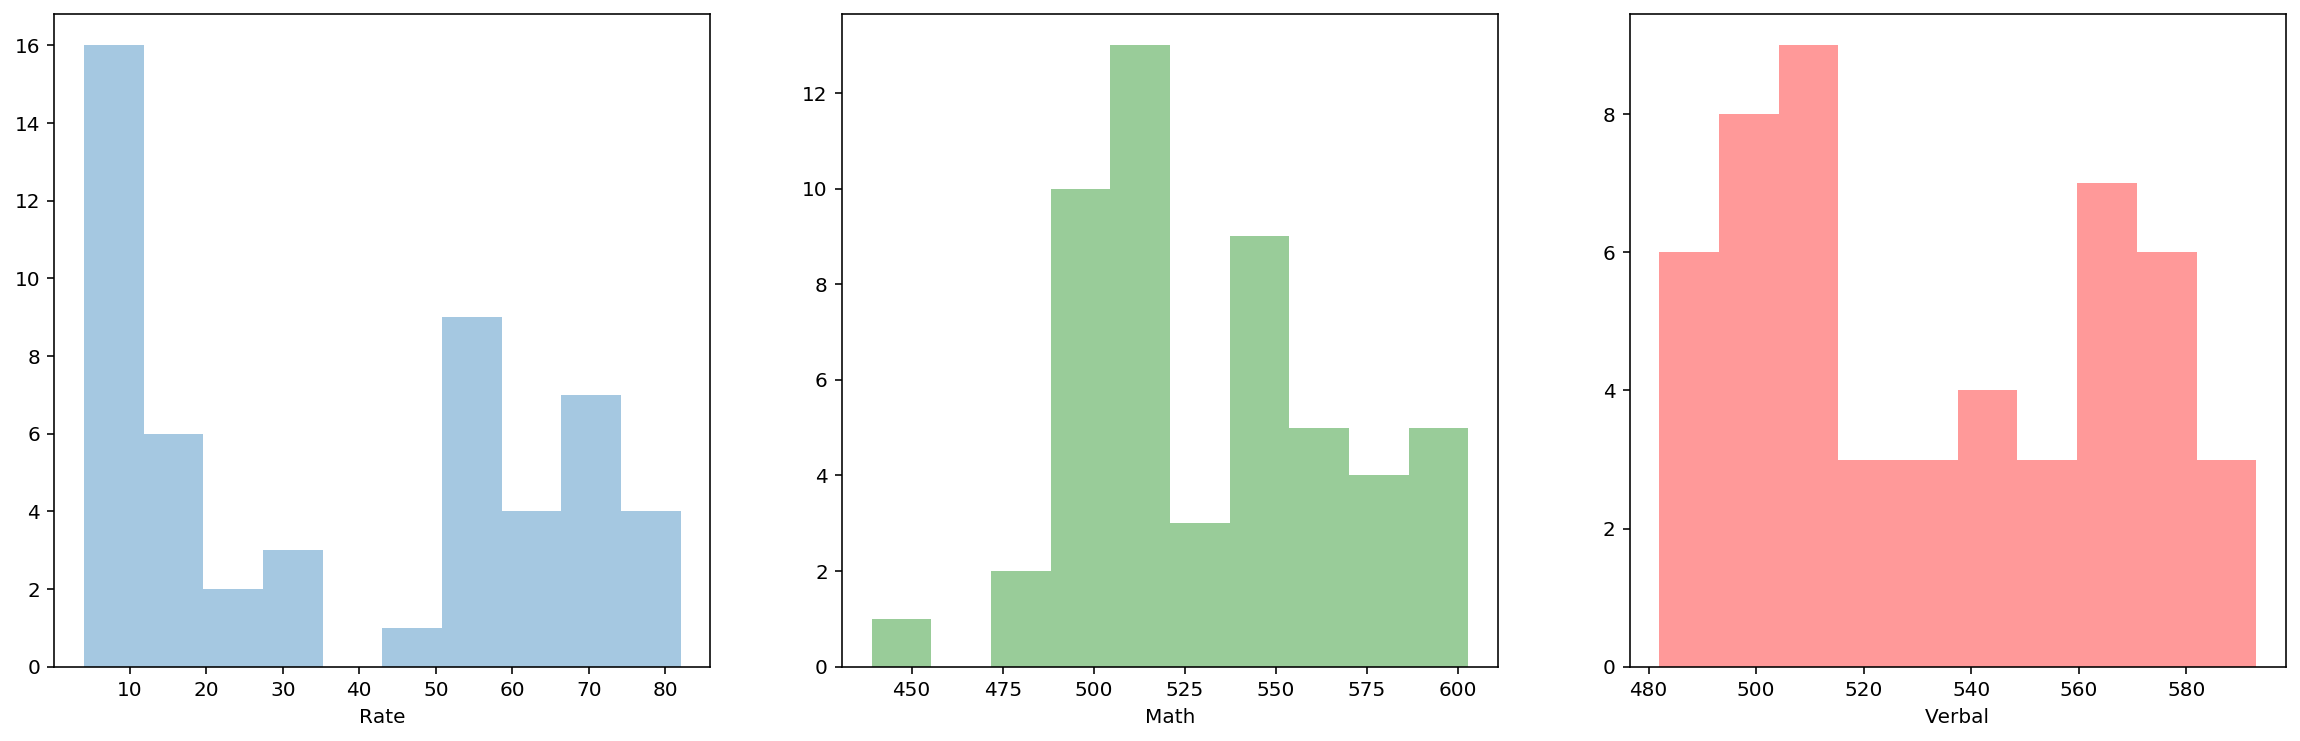

In [9]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 6))
sns.distplot(sats.Rate, bins=10, kde=False, ax=ax[0])
sns.distplot(sats.Math, bins=10, kde=False, ax=ax[1], color='g')
sns.distplot(sats.Verbal, bins=10, kde=False, ax=ax[2], color='r')
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

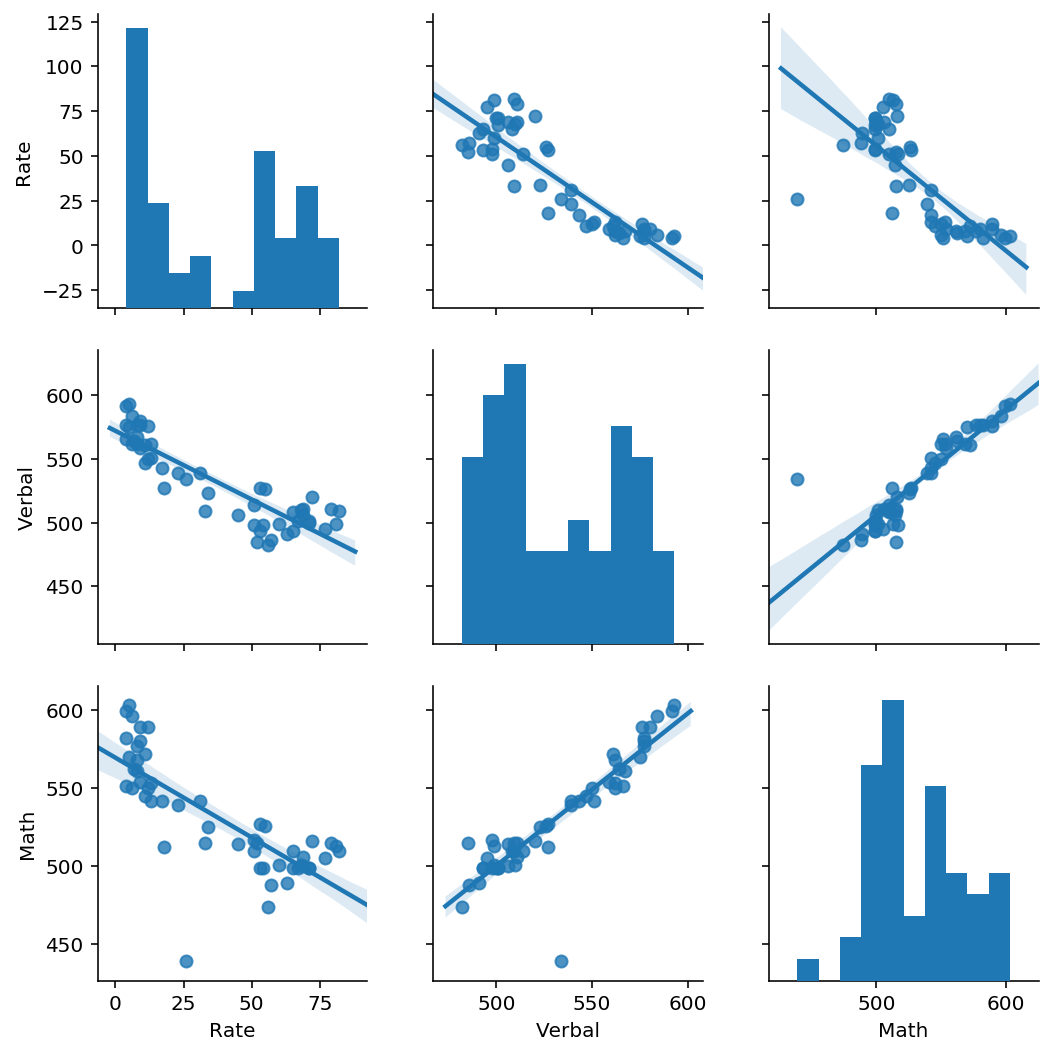

In [10]:
sns.pairplot(sats, kind='reg');

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [11]:
sats.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


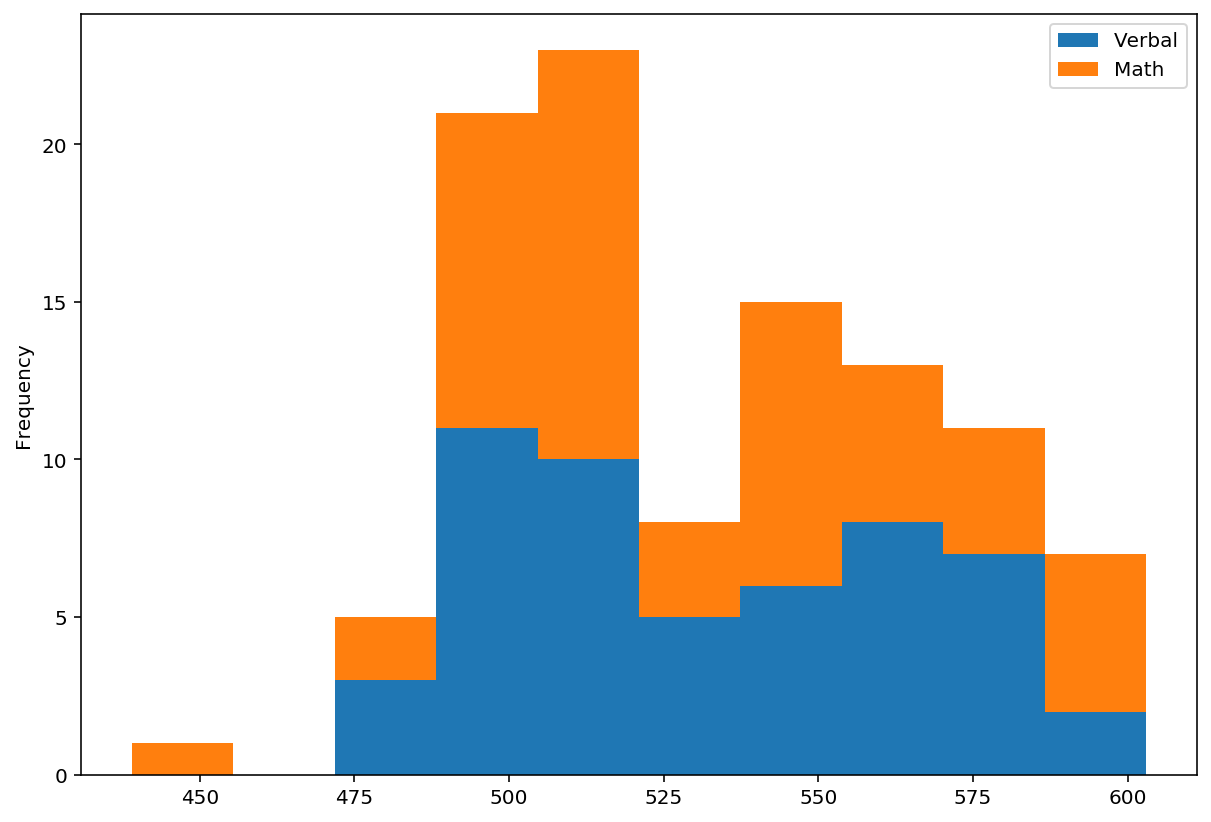

In [12]:
# sats[['Verbal','Math']].plot(kind='bar',stacked=True,figsize=(10,7))

sats[['Verbal','Math']].plot(kind='hist',stacked=True,figsize=(10,7))
plt.show();

# Interestingly if you move from bar to hist (above) the x-axis changes from 'States' to 'Score bins'

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

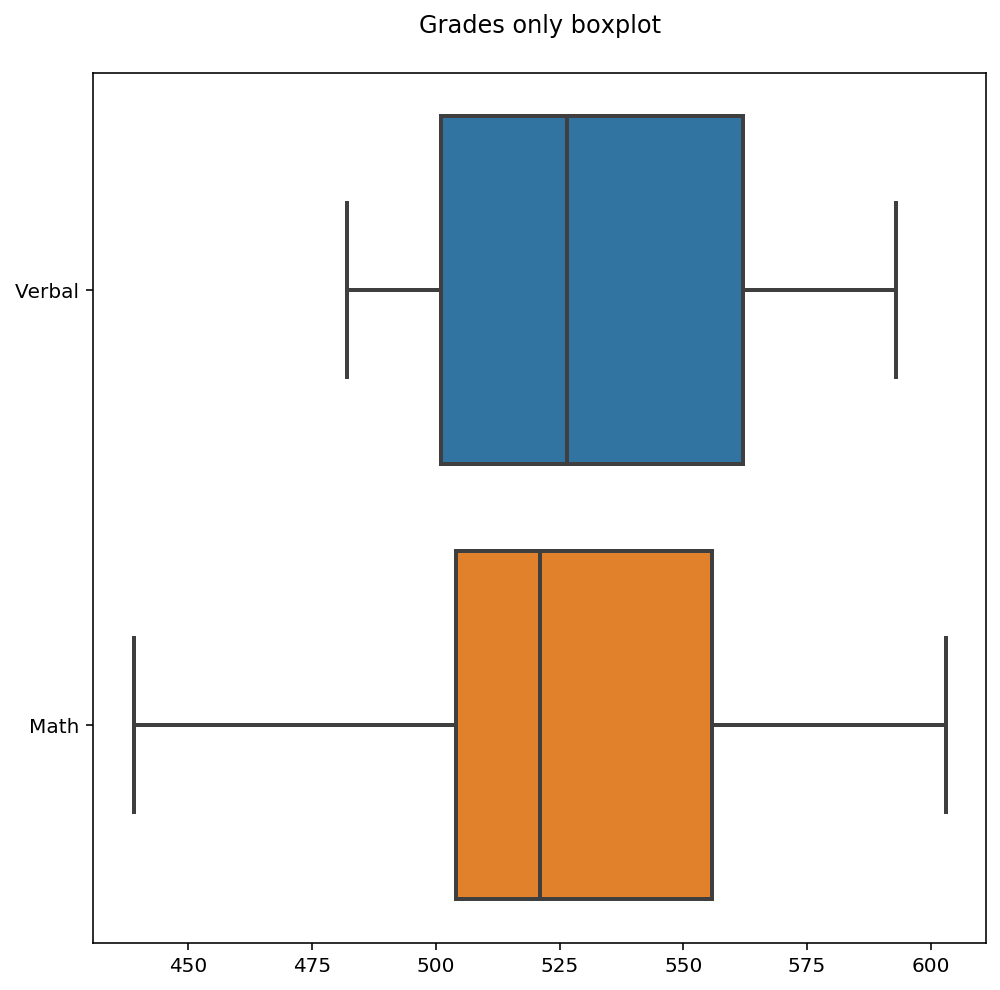

In [13]:
fig, ax = plt.subplots(figsize=(8,8))

sns.boxplot(data=sats[['Verbal','Math']], orient='h', fliersize=5, linewidth=2, ax=ax)
ax.set_title('Grades only boxplot\n')
plt.show()

# A boxplot is a standardized way of displaying the distribution of data based on:
# 'Minimum' = Q1-1.5IQR, first quartile (Q1), median, third quartile (Q3), and 'Maximum' = Q3+1.5IQR.
# So tells you how tightly your data is grouped and if it's skewed.
# It also shows you if outliers (ie, outside the Min, Max whiskers) exist, and how they're distributed as well.

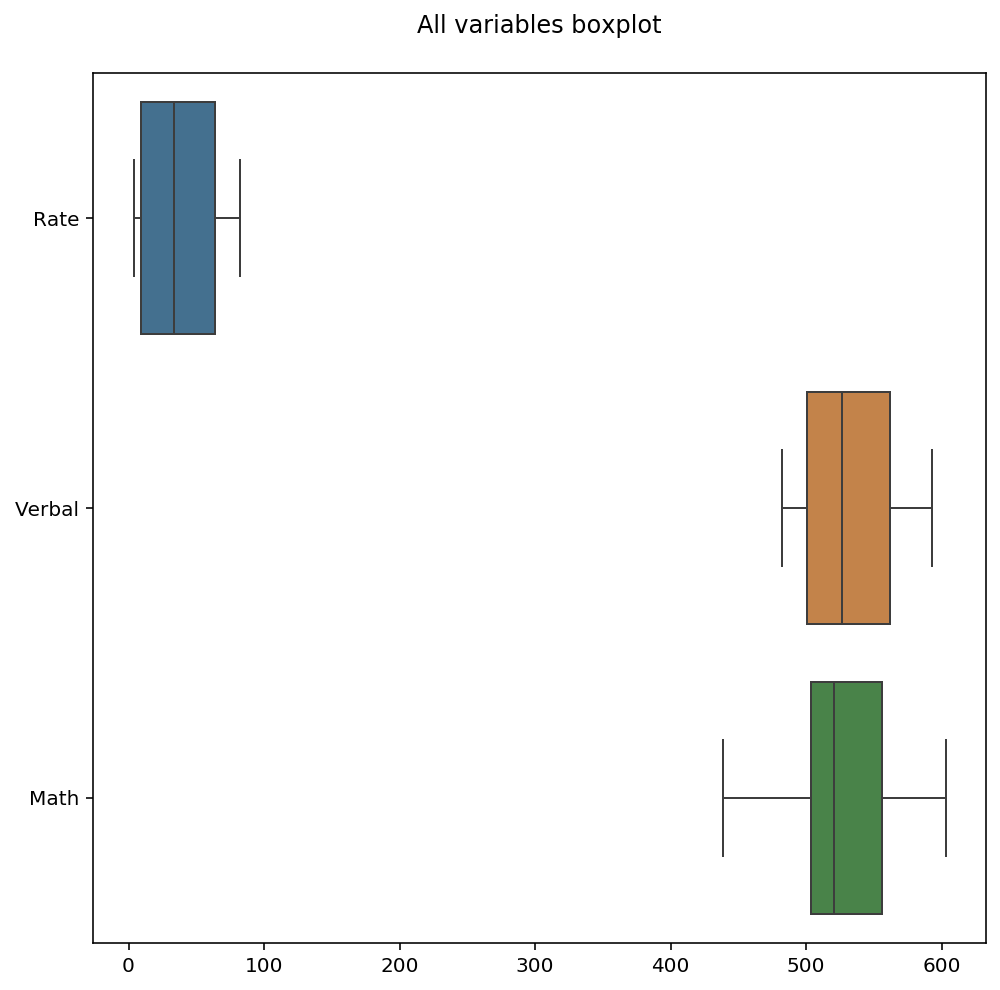

In [14]:
fig, ax = plt.subplots(figsize=(8,8))

sns.boxplot(data=sats, orient='h', fliersize=5, linewidth=1,
            saturation=0.5, ax=ax)
ax.set_title('All variables boxplot\n')
plt.show()

# Plotting Rate on same boxplot as Math and Verbal is problematic as it's in different units (ie, %) to the scores

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


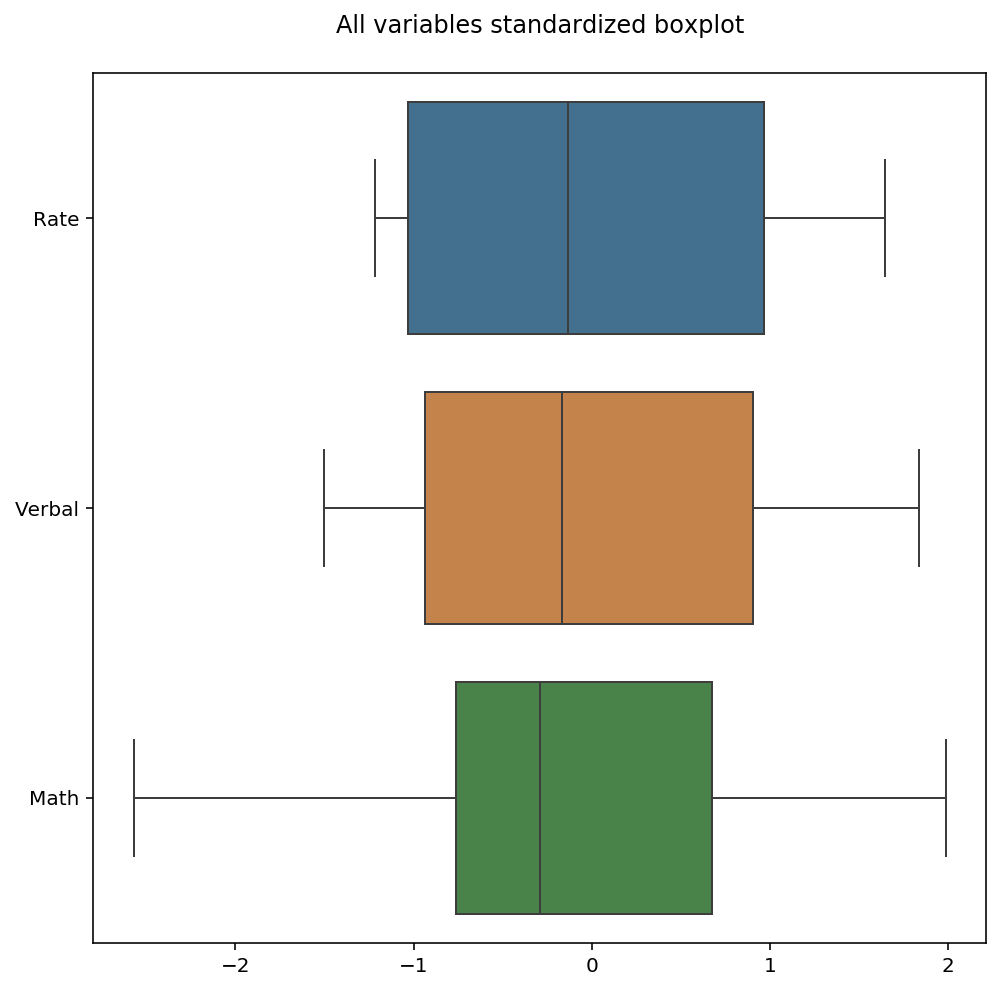

In [15]:
# can only apply the mean and std functions to number type columns:
sats_stand = (sats[['Rate','Verbal','Math']] - sats[['Rate','Verbal','Math']].mean()) / sats[['Rate','Verbal','Math']].std()

fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=sats_stand, orient='h', fliersize=5, linewidth=1, saturation=0.5, ax=ax)
ax.set_title('All variables standardized boxplot\n')

plt.show();

# Having normalized the data with respect to itself, we're able to take advantage of the aforementioned
# advantages of boxplots and also compare these characteristics visually between the 3 plots
# e.g. we see that Math has a much tighter IQR but dispersed distribution in the tails cmopared to the others

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [16]:
sats[sats['Verbal'] > sats['Verbal'].mean()].head()

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [17]:
sats[sats['Verbal'] > sats['Verbal'].median()].head()

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [18]:
sats = sats.assign(diff_Verbal_Math = sats.Verbal - sats.Math)
sats.head()

,State,Rate,Verbal,Math,diff_Verbal_Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [19]:
sats_mostverbal = sats.sort_values('diff_Verbal_Math',ascending=False)[:10]
sats_mostverbal

,State,Rate,Verbal,Math,diff_Verbal_Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
32,NM,13,551,542,9
31,TN,13,562,553,9
9,VA,68,510,501,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [20]:
sats_mostmath = sats.sort_values('diff_Verbal_Math',ascending=True)[:10]
sats_mostmath

,State,Rate,Verbal,Math,diff_Verbal_Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
51,All,45,506,514,-8


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [21]:
sats.corr()

,Rate,Verbal,Math,diff_Verbal_Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
diff_Verbal_Math,-0.101412,0.052600,-0.388219,1.000000


The correlation matrix tells me that:
    1. Rate has a strongly negative correlation with Math and Verbal grades, indicating that perhaps States overall
    score averages suffer when they widen thei pool of SAT candidates
    2. We also see a strongly positive correlation between Math and Verbal scores per state, ie. perhaps both 
    are caused to an extent by the Rate, and if lower Rate will cause Math higher, then it will do the same for 
    Verbal
    3. The 'diff' is uncorrelated with the other data points, therefore the participation rates and the scores 
    don't indicate whether a state will be biased towards Math or Verbal, it can be one or the other.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [22]:
sats.describe(include='all')

,State,Rate,Verbal,Math,diff_Verbal_Math
count,52,52.000000,52.000000,52.000000,52.000000
unique,52,NaN,NaN,NaN,NaN
top,KY,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,37.153846,532.019231,531.500000,0.519231
std,NaN,27.301788,33.236225,36.014975,15.729939
min,NaN,4.000000,482.000000,439.000000,-30.000000
25%,NaN,9.000000,501.000000,504.000000,-6.000000
50%,NaN,33.500000,526.500000,521.000000,0.000000
75%,NaN,63.500000,562.000000,555.750000,4.250000


Categorical stats:
    Count = Count non-null values
    Unique = unique values, incl null values
    top = similar to mode, most frequent observation
    freq = it's frequency

Continuous stats:
    Count = Count non-null values
    Mean = Average of values in the column
    Min / Max = Min / Max of values in that column
    std = standard deviation
    25%, 50%, 75% = quartiles

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [167]:
# The covariance is a measure of "relatedness" between variables. It is literally the sum of deviations from 
# the mean of 𝑋 times deviations from the mean of 𝑌 adjusted by the sample size 𝑁.

# The correlation matrix is covariance / std(X)std(Y), essentially the covariance between two variables is 
# normalized with the std of each variable: this giving us a number between -1 and 1 that can be used to compare
# relatedness across different variables. Because it's a unit-free ratio, we're able to compare correlations.

# The covariance is not very interpretable. The values are difficult to read because they are relative to the 
# variance of the variables. A much more common metric, and one directly calculable from the covariance, is 
# the correlation.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [23]:
pd.set_option('max_columns', 100)

drug = pd.read_csv('drug-use-by-age.csv')
drug

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [24]:
drug.info()
# Some columns in string type will preclude our ability to plot them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [25]:
# so we replace '-' with 0, and make all fields into float:
drug = drug.replace('-',0)

In [26]:
# change dtypes to float, as even now with 0 the columns remeain objects:
# do this by basically choosing all data cols, floating, then reassigning them in original drug dataframe

drug.loc[:,'alcohol-use':'sedative-frequency'] = drug.loc[:,'alcohol-use':'sedative-frequency'].applymap(float)

In [27]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,0.0,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [28]:
drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

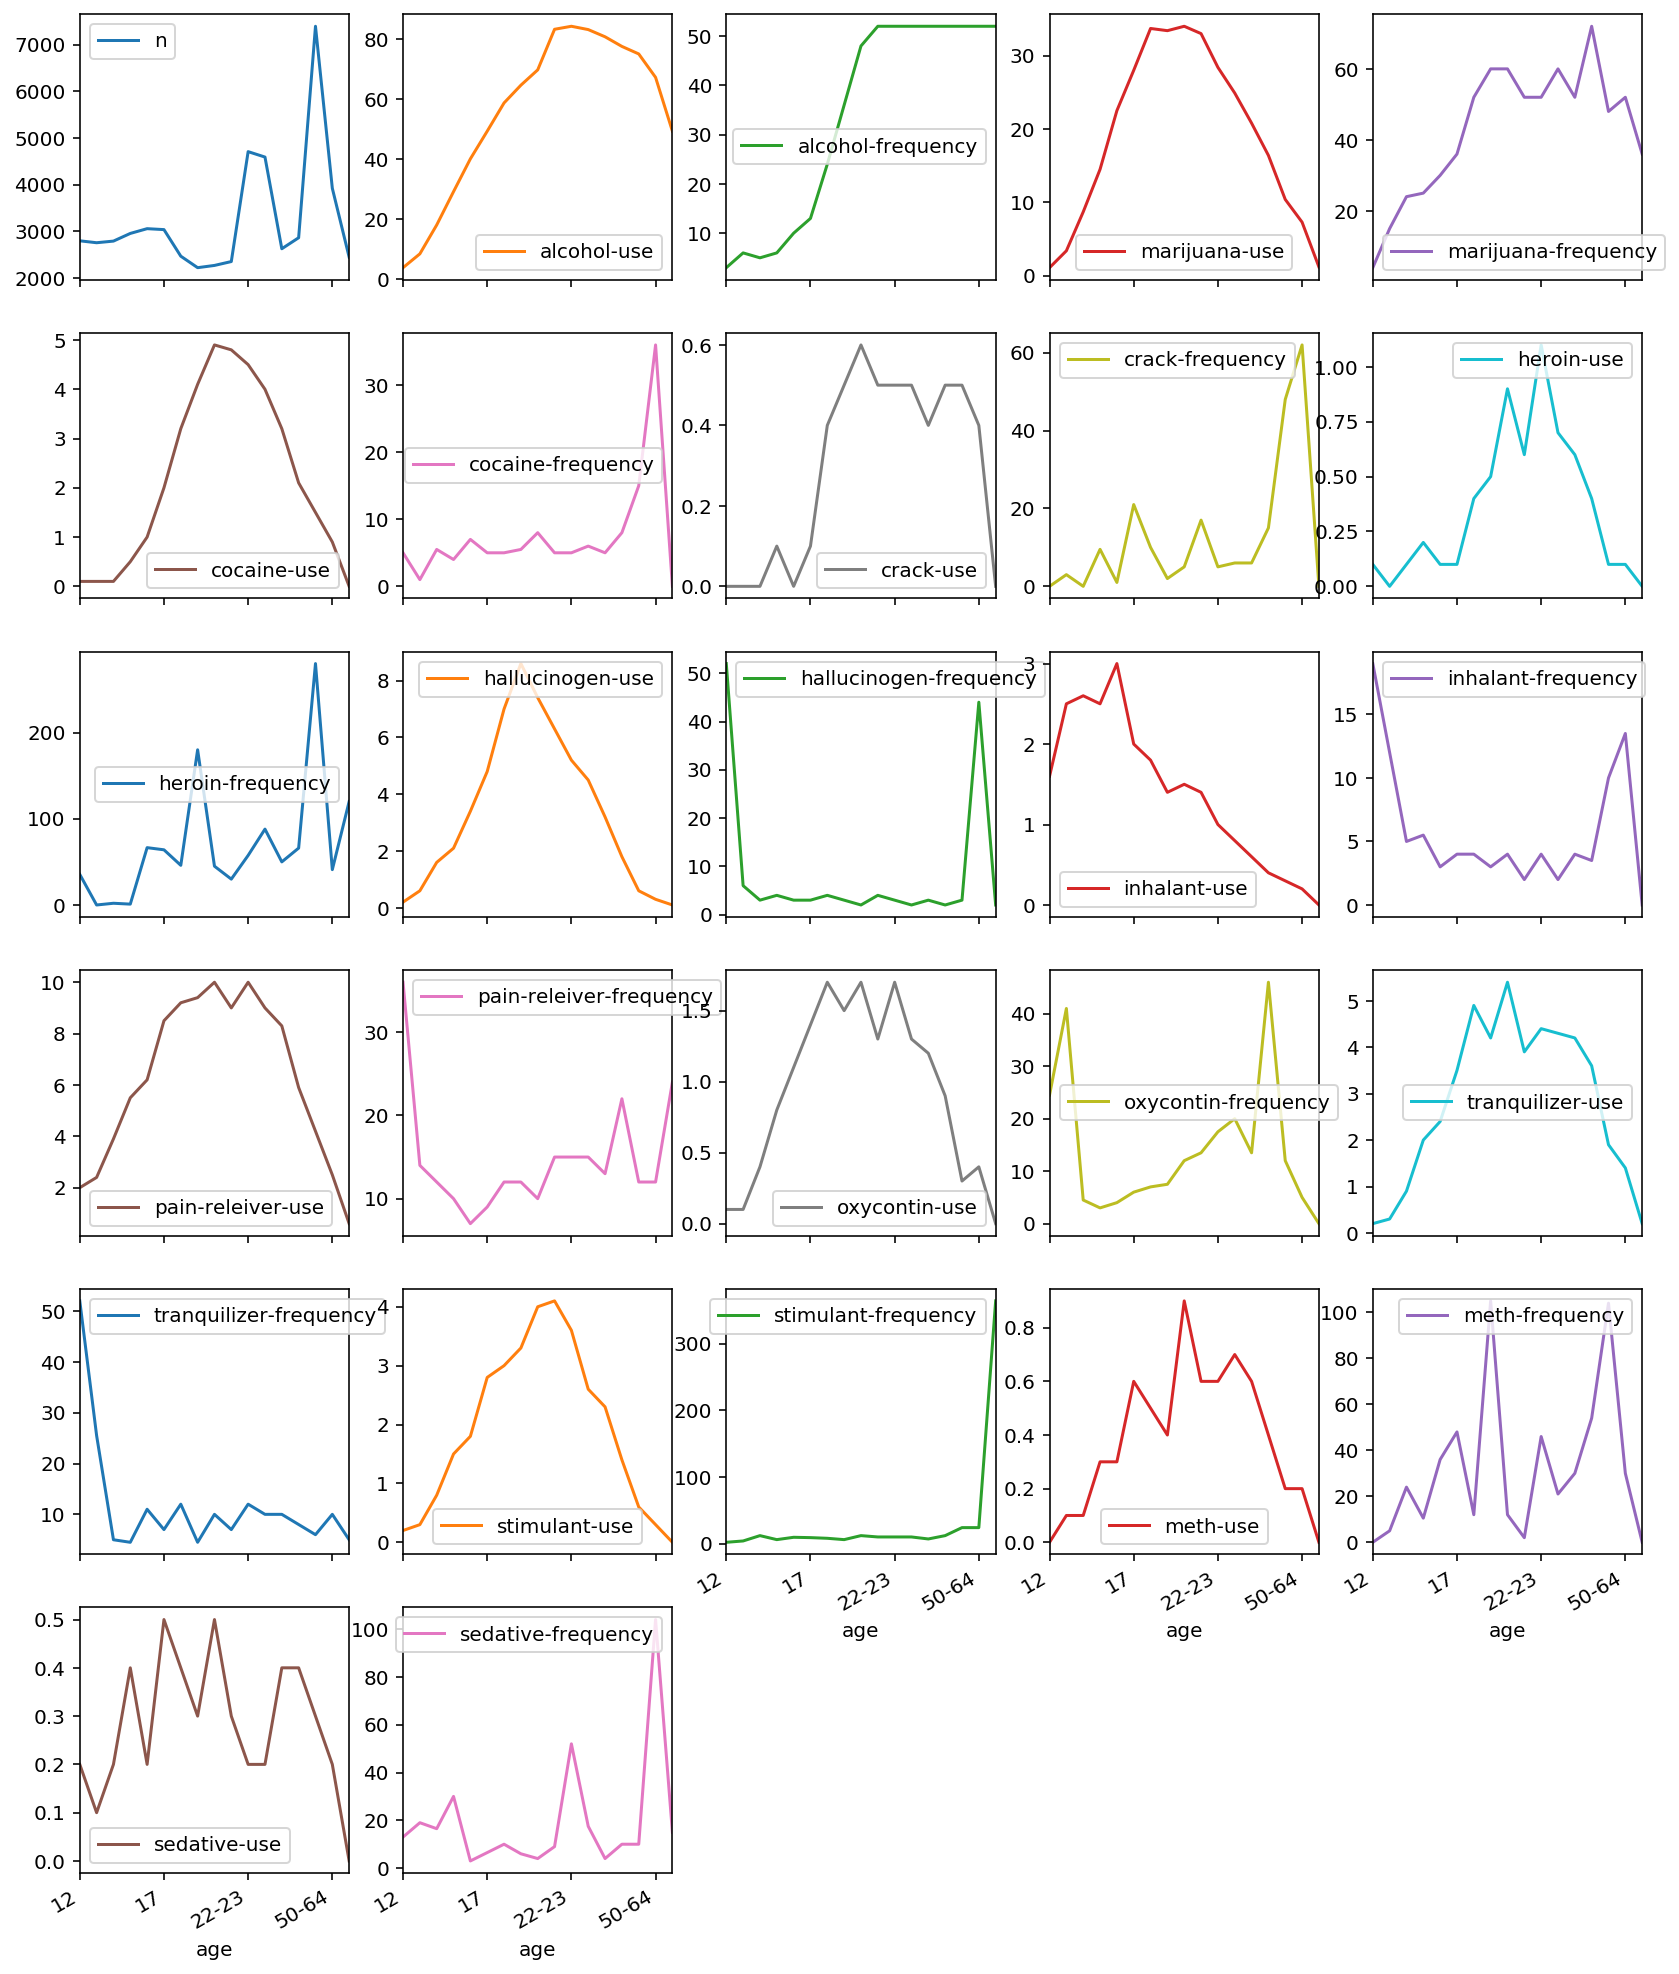

In [29]:
# A quick glance at each drug trend vs. age, we can see that ages 12/13 have some erroneous data:
# e.g. hallucinogen-frequency, inhalant-frequency, pain-releiver-frequency, oxycontin-frequency, tranquilizer-frequency

drug.plot.line(x='age',subplots=True,figsize=(14, 32),layout=(10,5));

# Looking at the above plots:

Frequency data for ages 12 and 13 and 65+ looks suspiciously high for some drugs, but I will endeavour to keep as it looks to be partly medical-related, and applicable only to a very small subset of the population.
I will create a version of the data without these rows for use later in the heatmaps

In [30]:
drug2 = drug.loc[2:15,:]
drug2.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [31]:
round(drug.describe(),1)

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0
mean,3251.1,55.4,33.4,18.9,42.9,2.2,7.4,0.3,12.4,0.4,69.0,3.4,8.4,1.4,5.8,6.3,14.7,0.9,13.9,2.8,11.7,1.9,31.1,0.4,31.7,0.3,19.4
std,1297.9,26.9,21.3,12.0,18.4,1.8,8.0,0.2,17.4,0.3,70.2,2.8,15.0,0.9,4.9,3.2,6.9,0.6,12.9,1.8,11.5,1.4,86.0,0.3,32.2,0.1,24.8
min,2223.0,3.9,3.0,1.1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.0,0.0,0.6,7.0,0.0,0.0,0.2,4.5,0.0,2.0,0.0,0.0,0.0,3.0
25%,2469.0,40.1,10.0,8.7,30.0,0.5,5.0,0.0,2.0,0.1,35.5,0.6,3.0,0.6,3.0,3.9,12.0,0.4,5.0,1.4,6.0,0.6,7.0,0.2,10.5,0.2,6.5
50%,2798.0,64.6,48.0,20.8,52.0,2.0,5.0,0.4,6.0,0.2,50.0,3.2,3.0,1.4,4.0,6.2,12.0,1.1,12.0,3.5,10.0,1.8,10.0,0.4,24.0,0.3,10.0
75%,3058.0,77.5,52.0,28.4,52.0,4.0,7.0,0.5,15.0,0.6,66.5,5.2,4.0,2.0,5.5,9.0,15.0,1.4,17.5,4.2,11.0,3.0,12.0,0.6,46.0,0.4,17.5
max,7391.0,84.2,52.0,34.0,72.0,4.9,36.0,0.6,62.0,1.1,280.0,8.6,52.0,3.0,19.0,10.0,36.0,1.7,46.0,5.4,52.0,4.1,364.0,0.9,105.0,0.5,104.0


In [137]:
# I will also create separate usage and frequency dataframes so I can see a drug-comparison plot more clearly:

use2_columns = [col for col in drug2.columns if 'use' in col or 'age' in col]
drug2_use = drug2[use_columns]

freq2_columns = [col for col in drug2.columns if 'frequency' in col or 'age' in col]
drug2_freq = drug2[freq_columns]

In [165]:
# Do same for pre-filtered data:
use_columns = [col for col in drug2.columns if 'use' in col or 'age' in col]
drug_use = drug[use_columns]

freq_columns = [col for col in drug2.columns if 'frequency' in col or 'age' in col]
drug_freq = drug[freq_columns]

KeyError: "['age'] not in index"

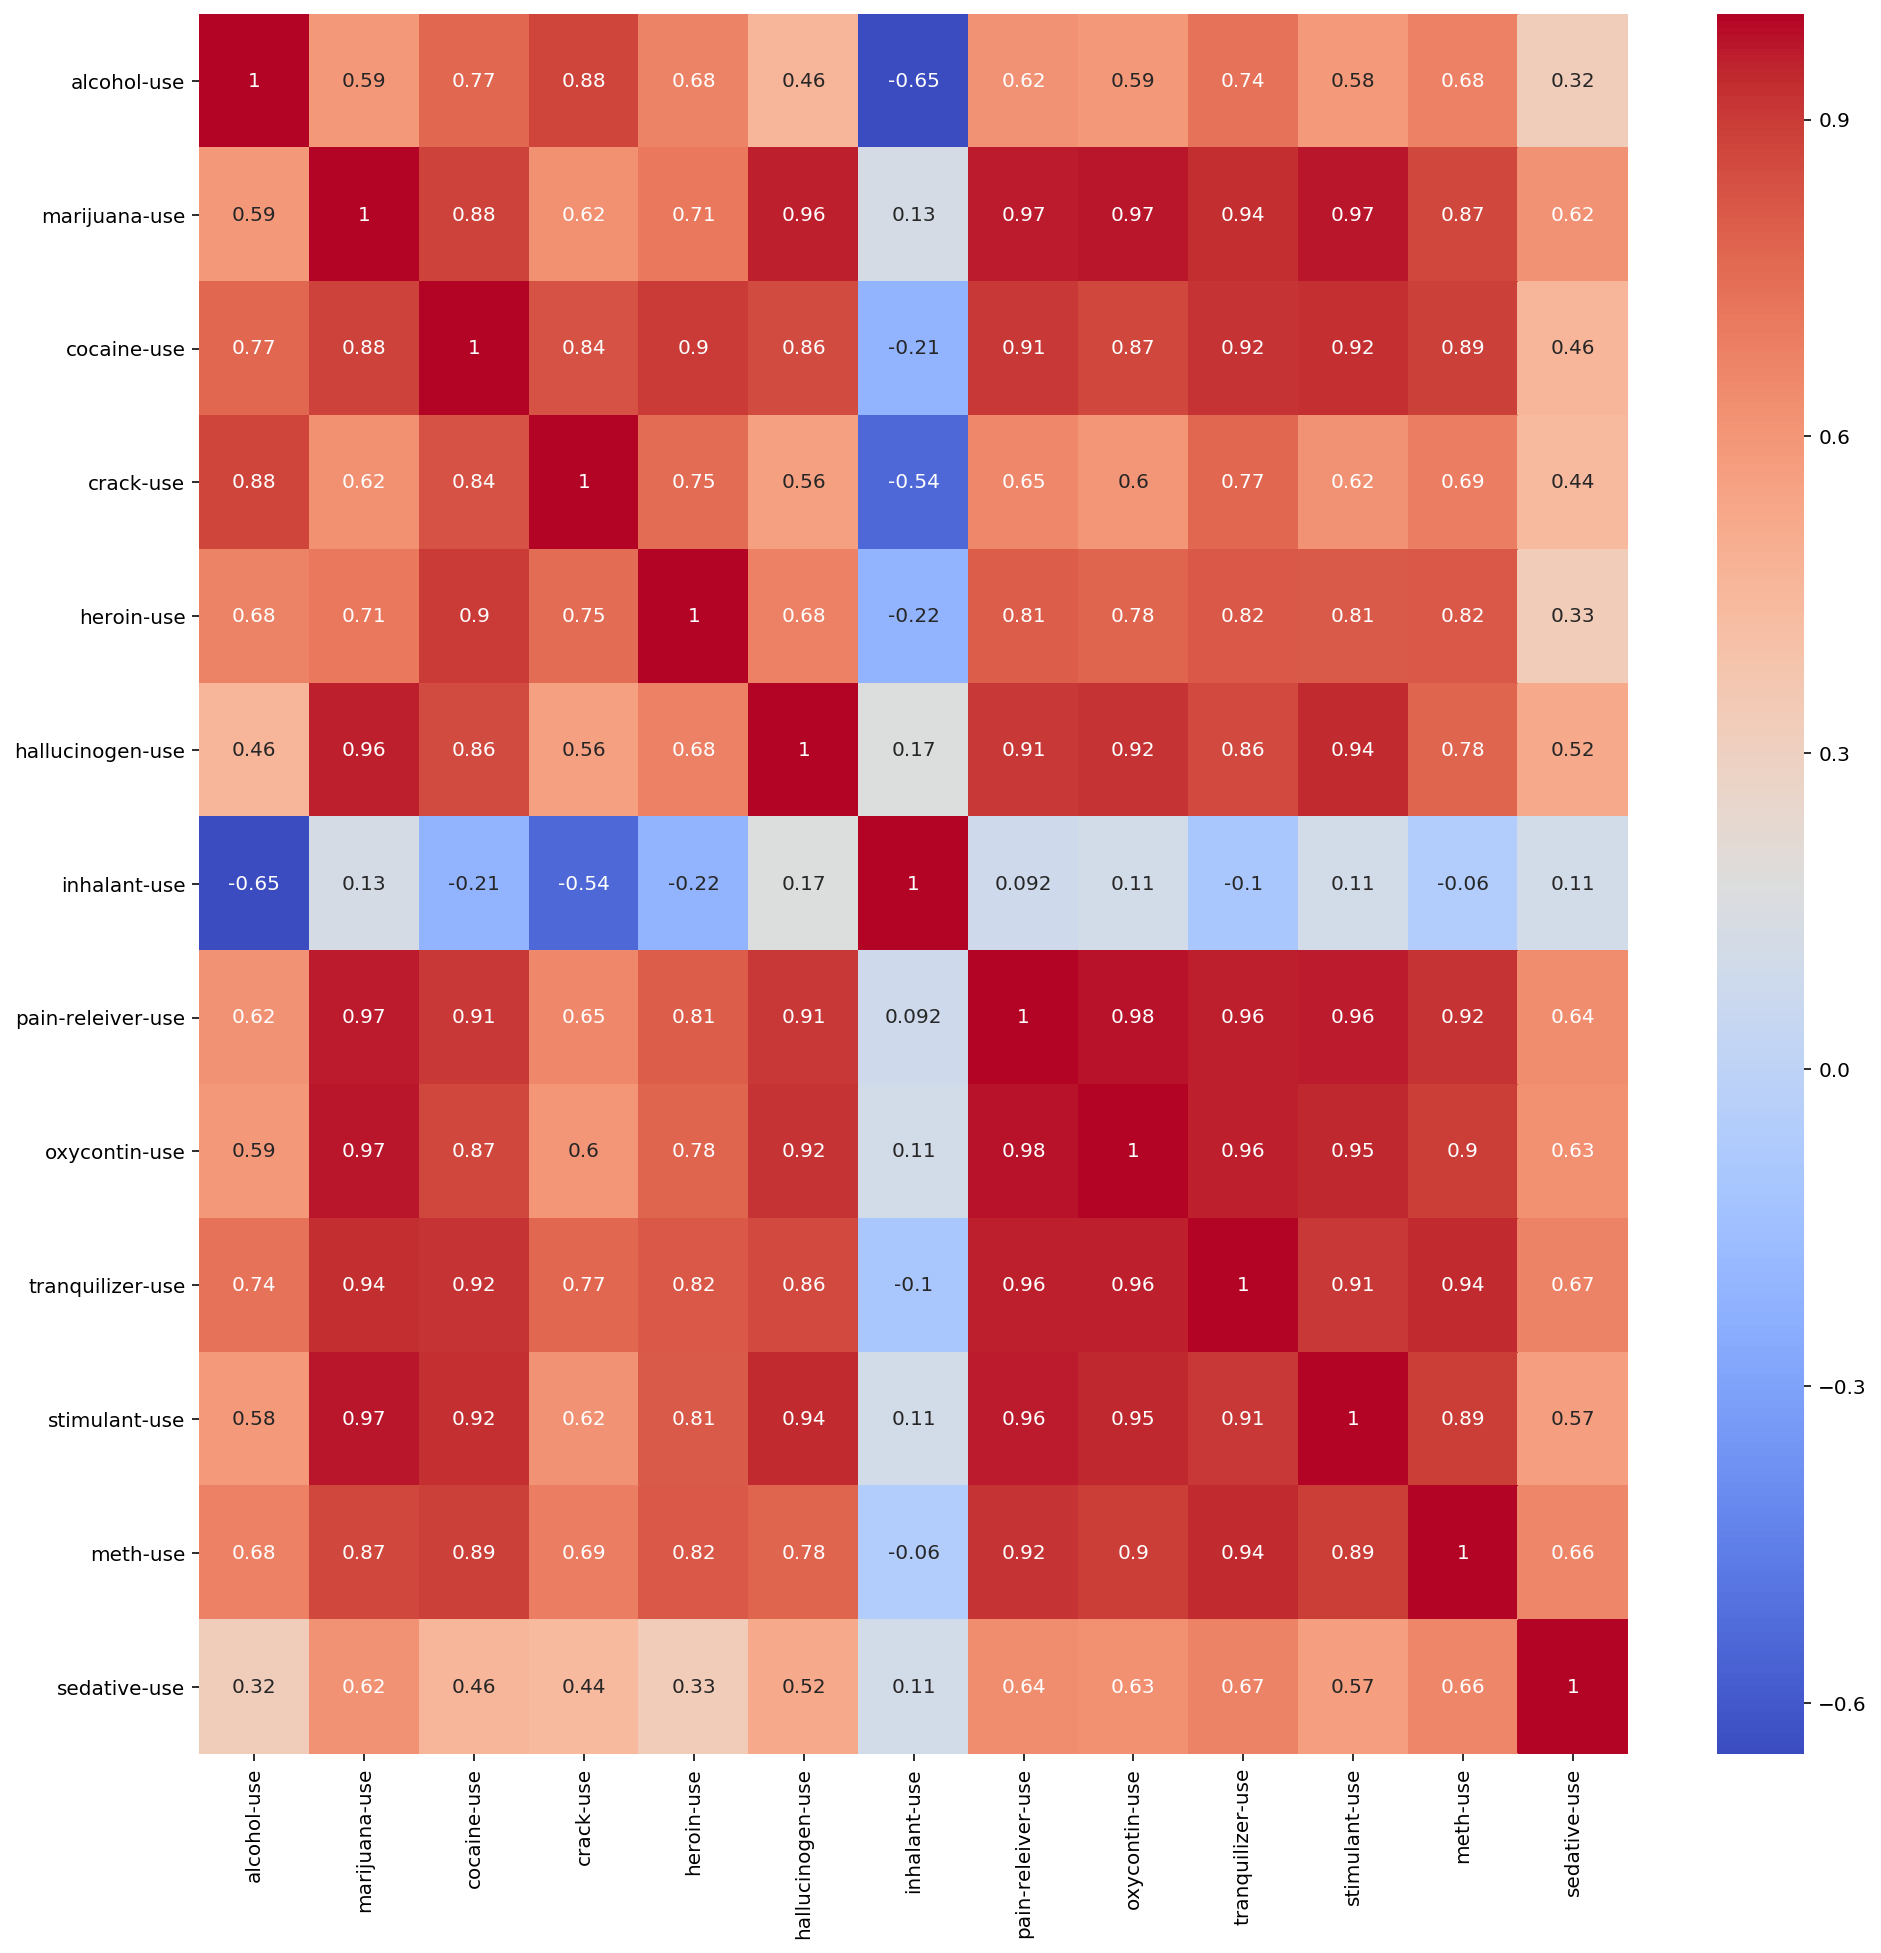

In [35]:
# Plot heatmap to visualize correlations:
plt.figure(figsize=(16, 16))
sns.heatmap(drug_use.corr(), annot=True, cmap="coolwarm");

# It appears drug use is very positively correlation, ie. as it increases for one drug, it increases for another.
# So we can make a broad age-related inference that 20 - 30 years olds in general do more
# There are some drug exceptions, e.g. inhalants, which appear negatively correlated to everything else
# The data suggests this is an adolescent drug

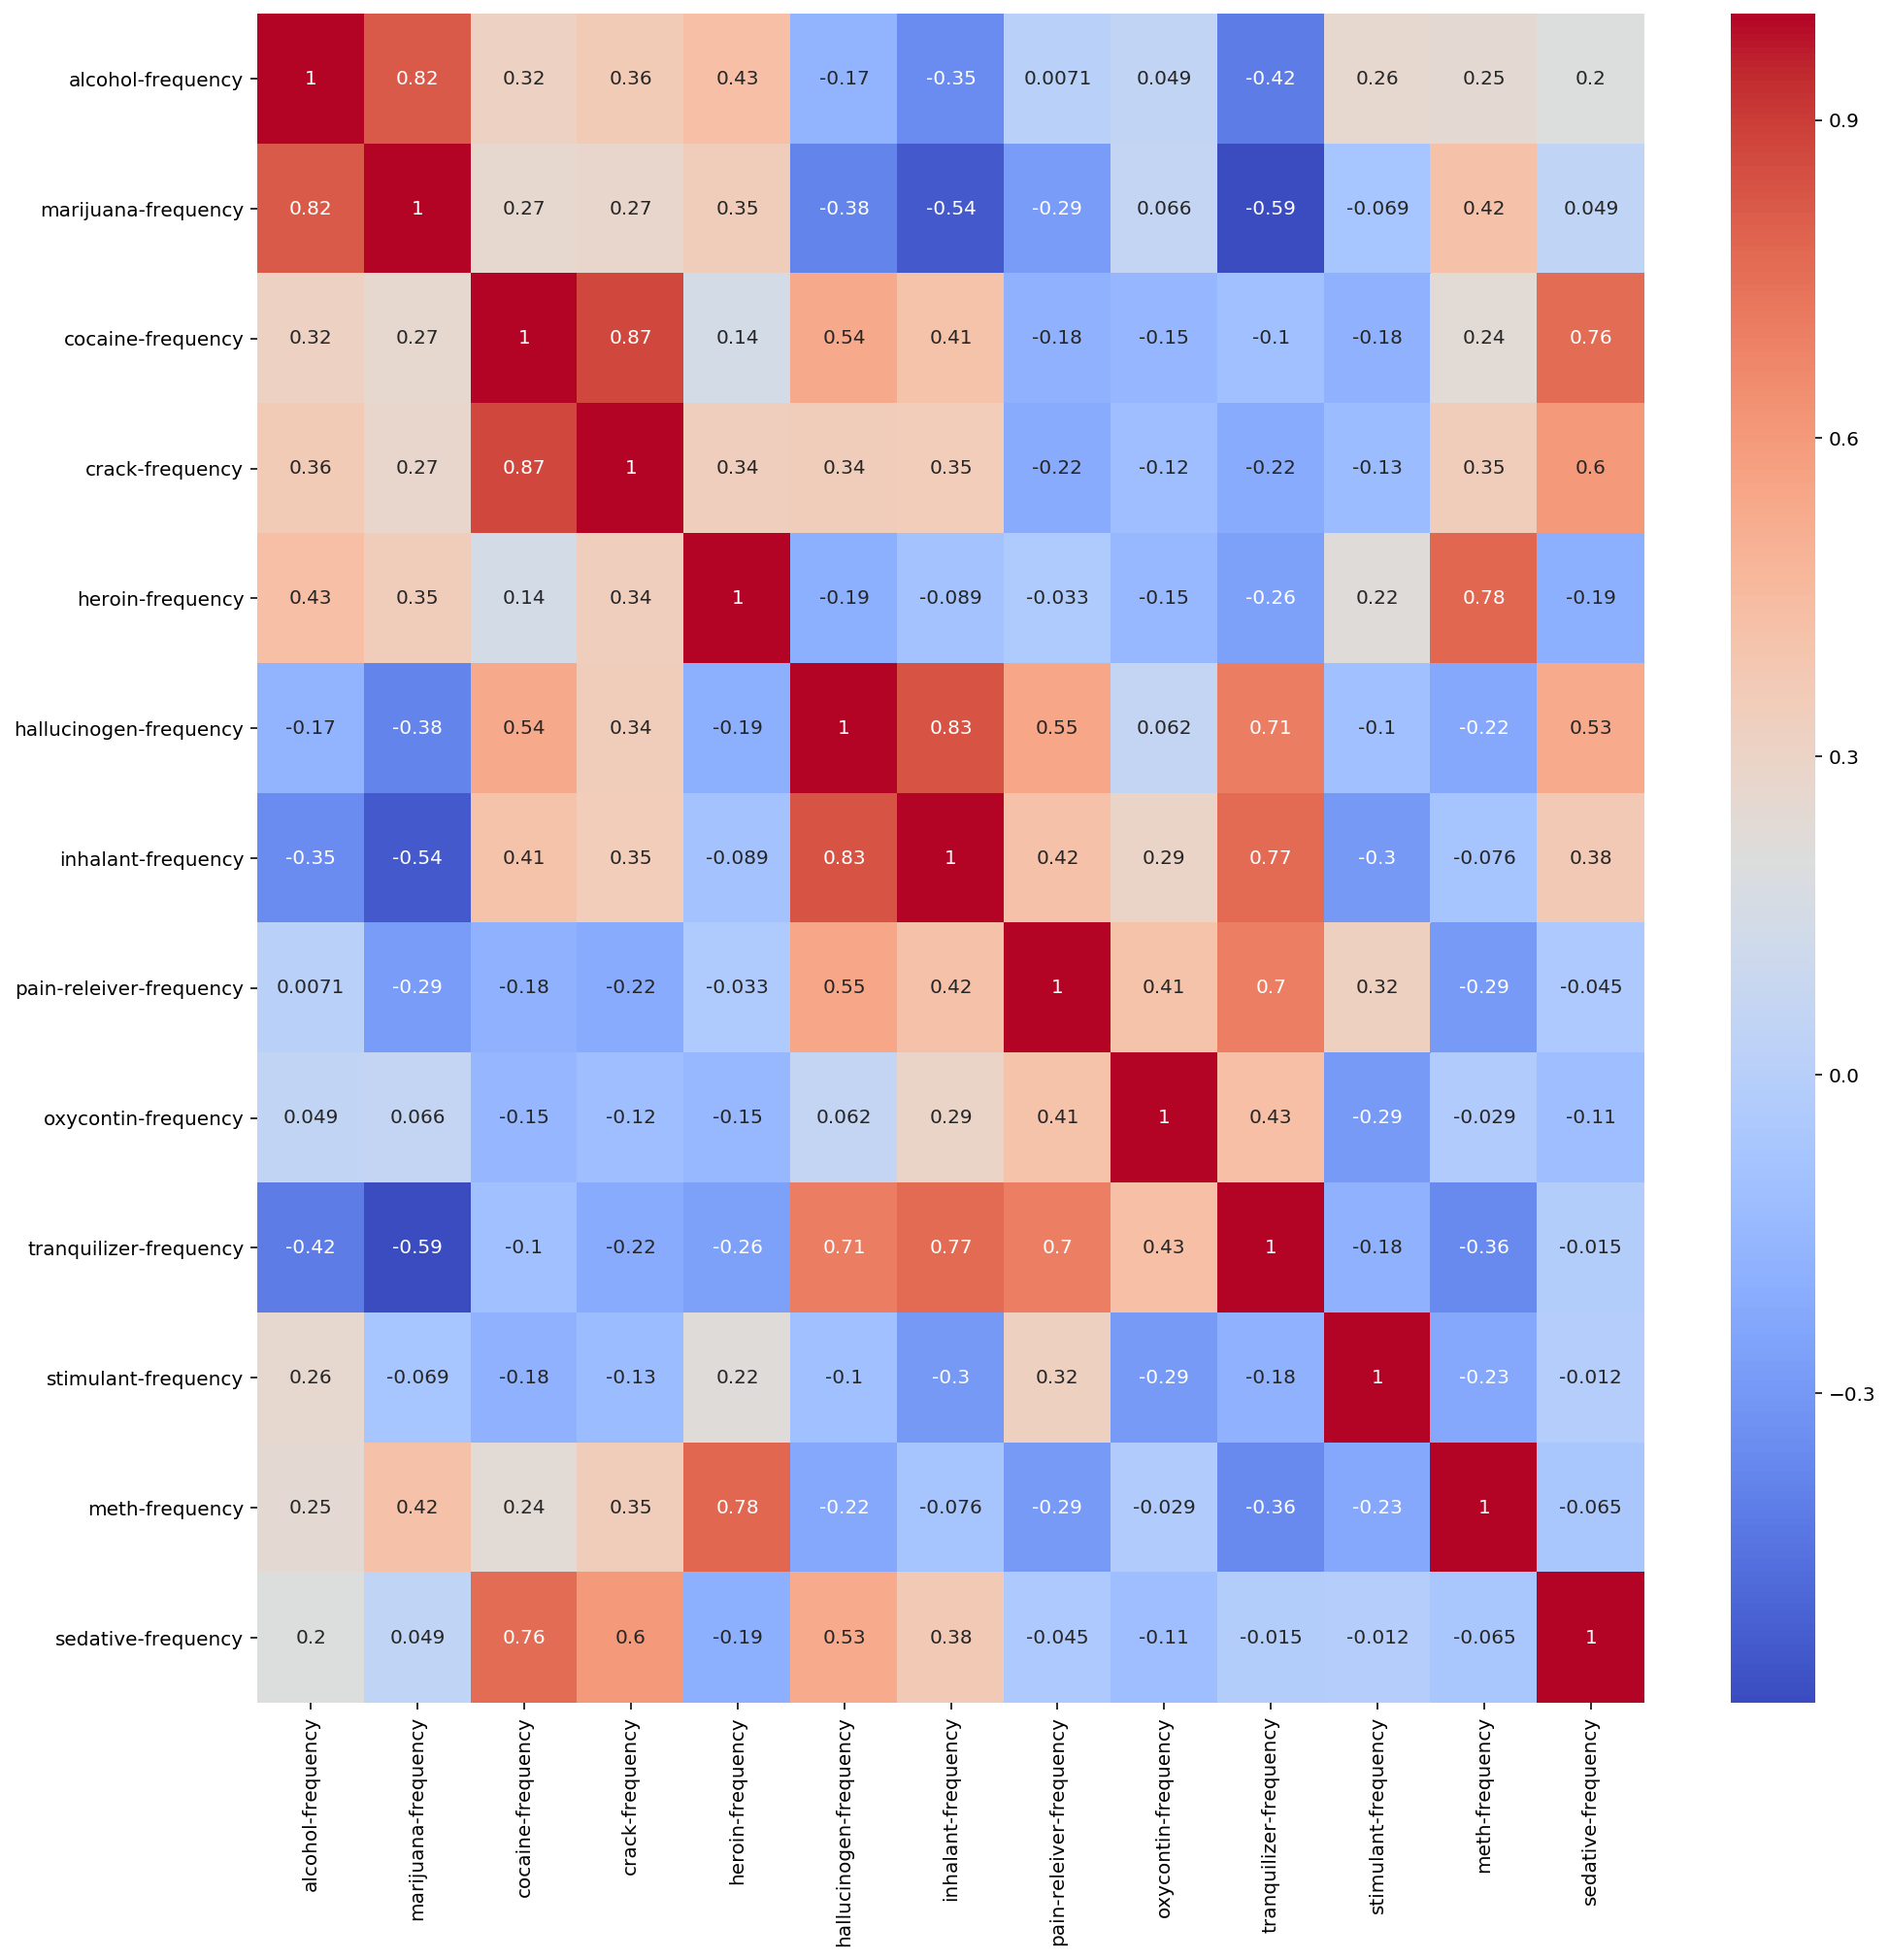

In [139]:
# Same for frequencies:
plt.figure(figsize=(16, 16))
sns.heatmap(drug_freq.corr(), annot=True, cmap="coolwarm");

# frequency of drug use is not as broadly correlated among different drugs:

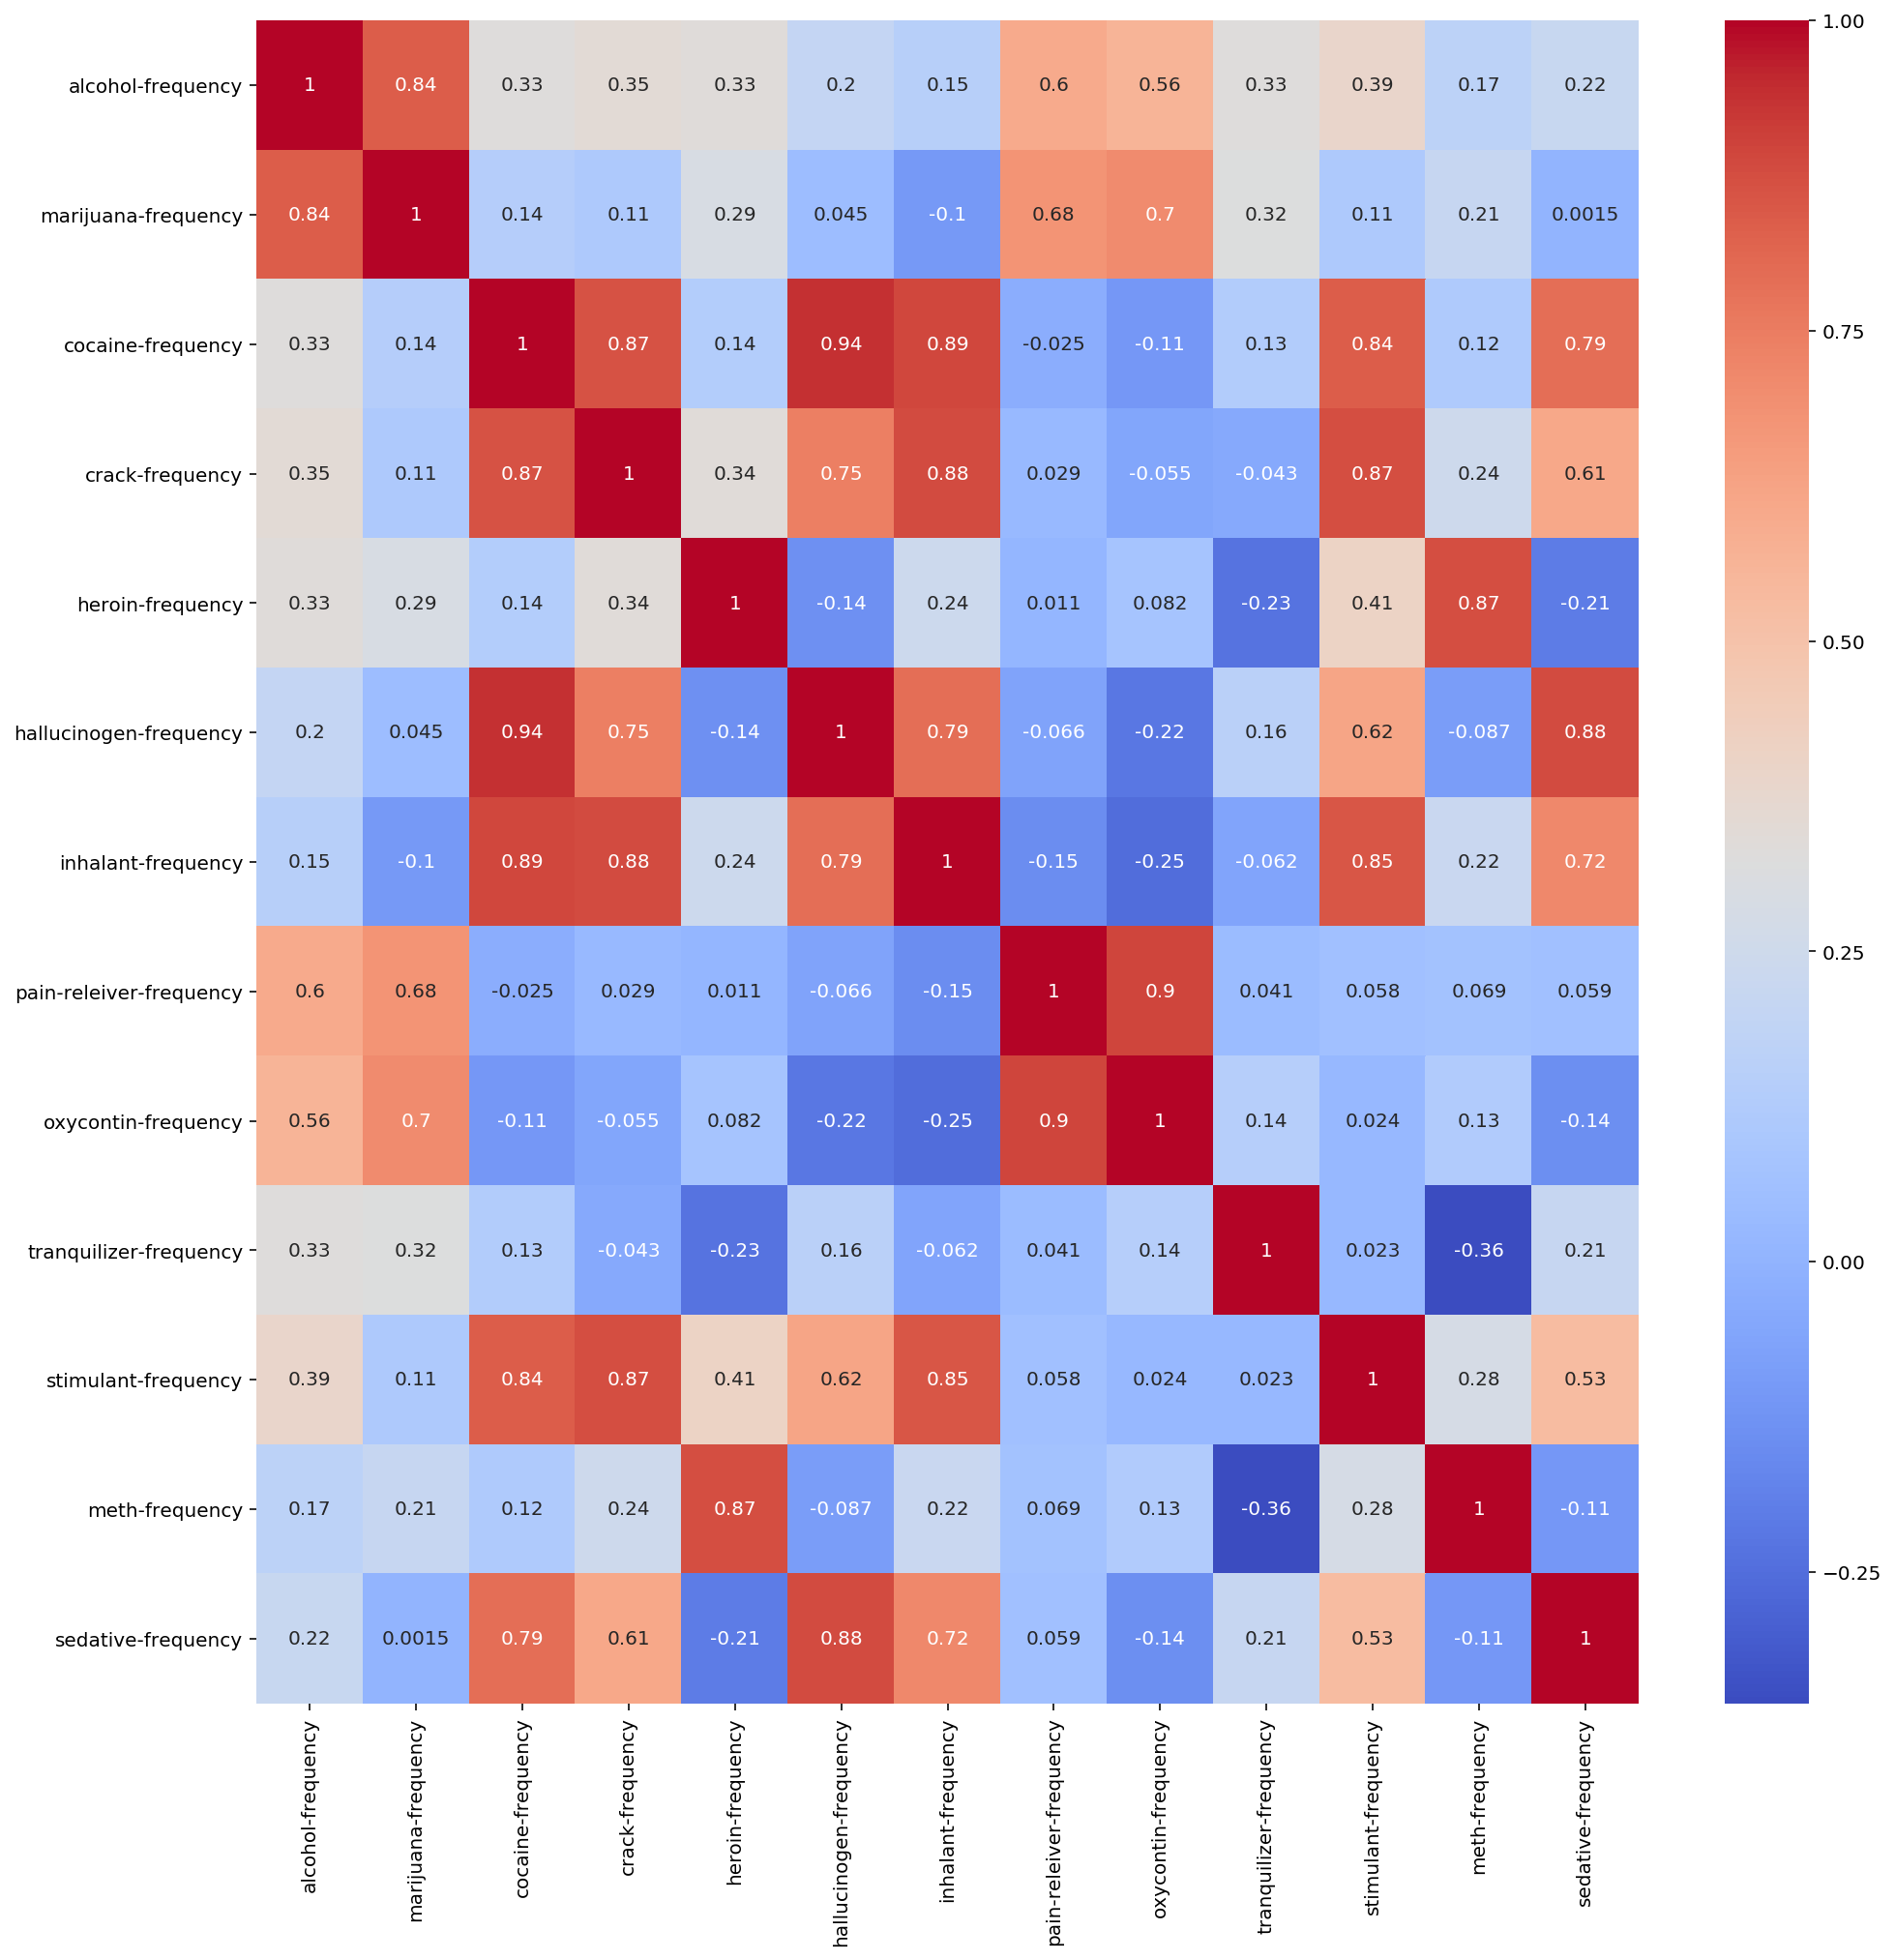

In [140]:
# repeat on data that excludes 12-13 and 65+ year olds:
plt.figure(figsize=(16, 16))
sns.heatmap(drug2_freq.corr(), annot=True, cmap="coolwarm");

# now there are pockets of high correlation:
    # Alcohol vs Marijuana vs Pain-Releiver vs Oxycontin
    # Cocaine vs Crack vs Hallucinogen vs Inhalants vs Stimulant vs Sedative
    # Heroin vs Meth

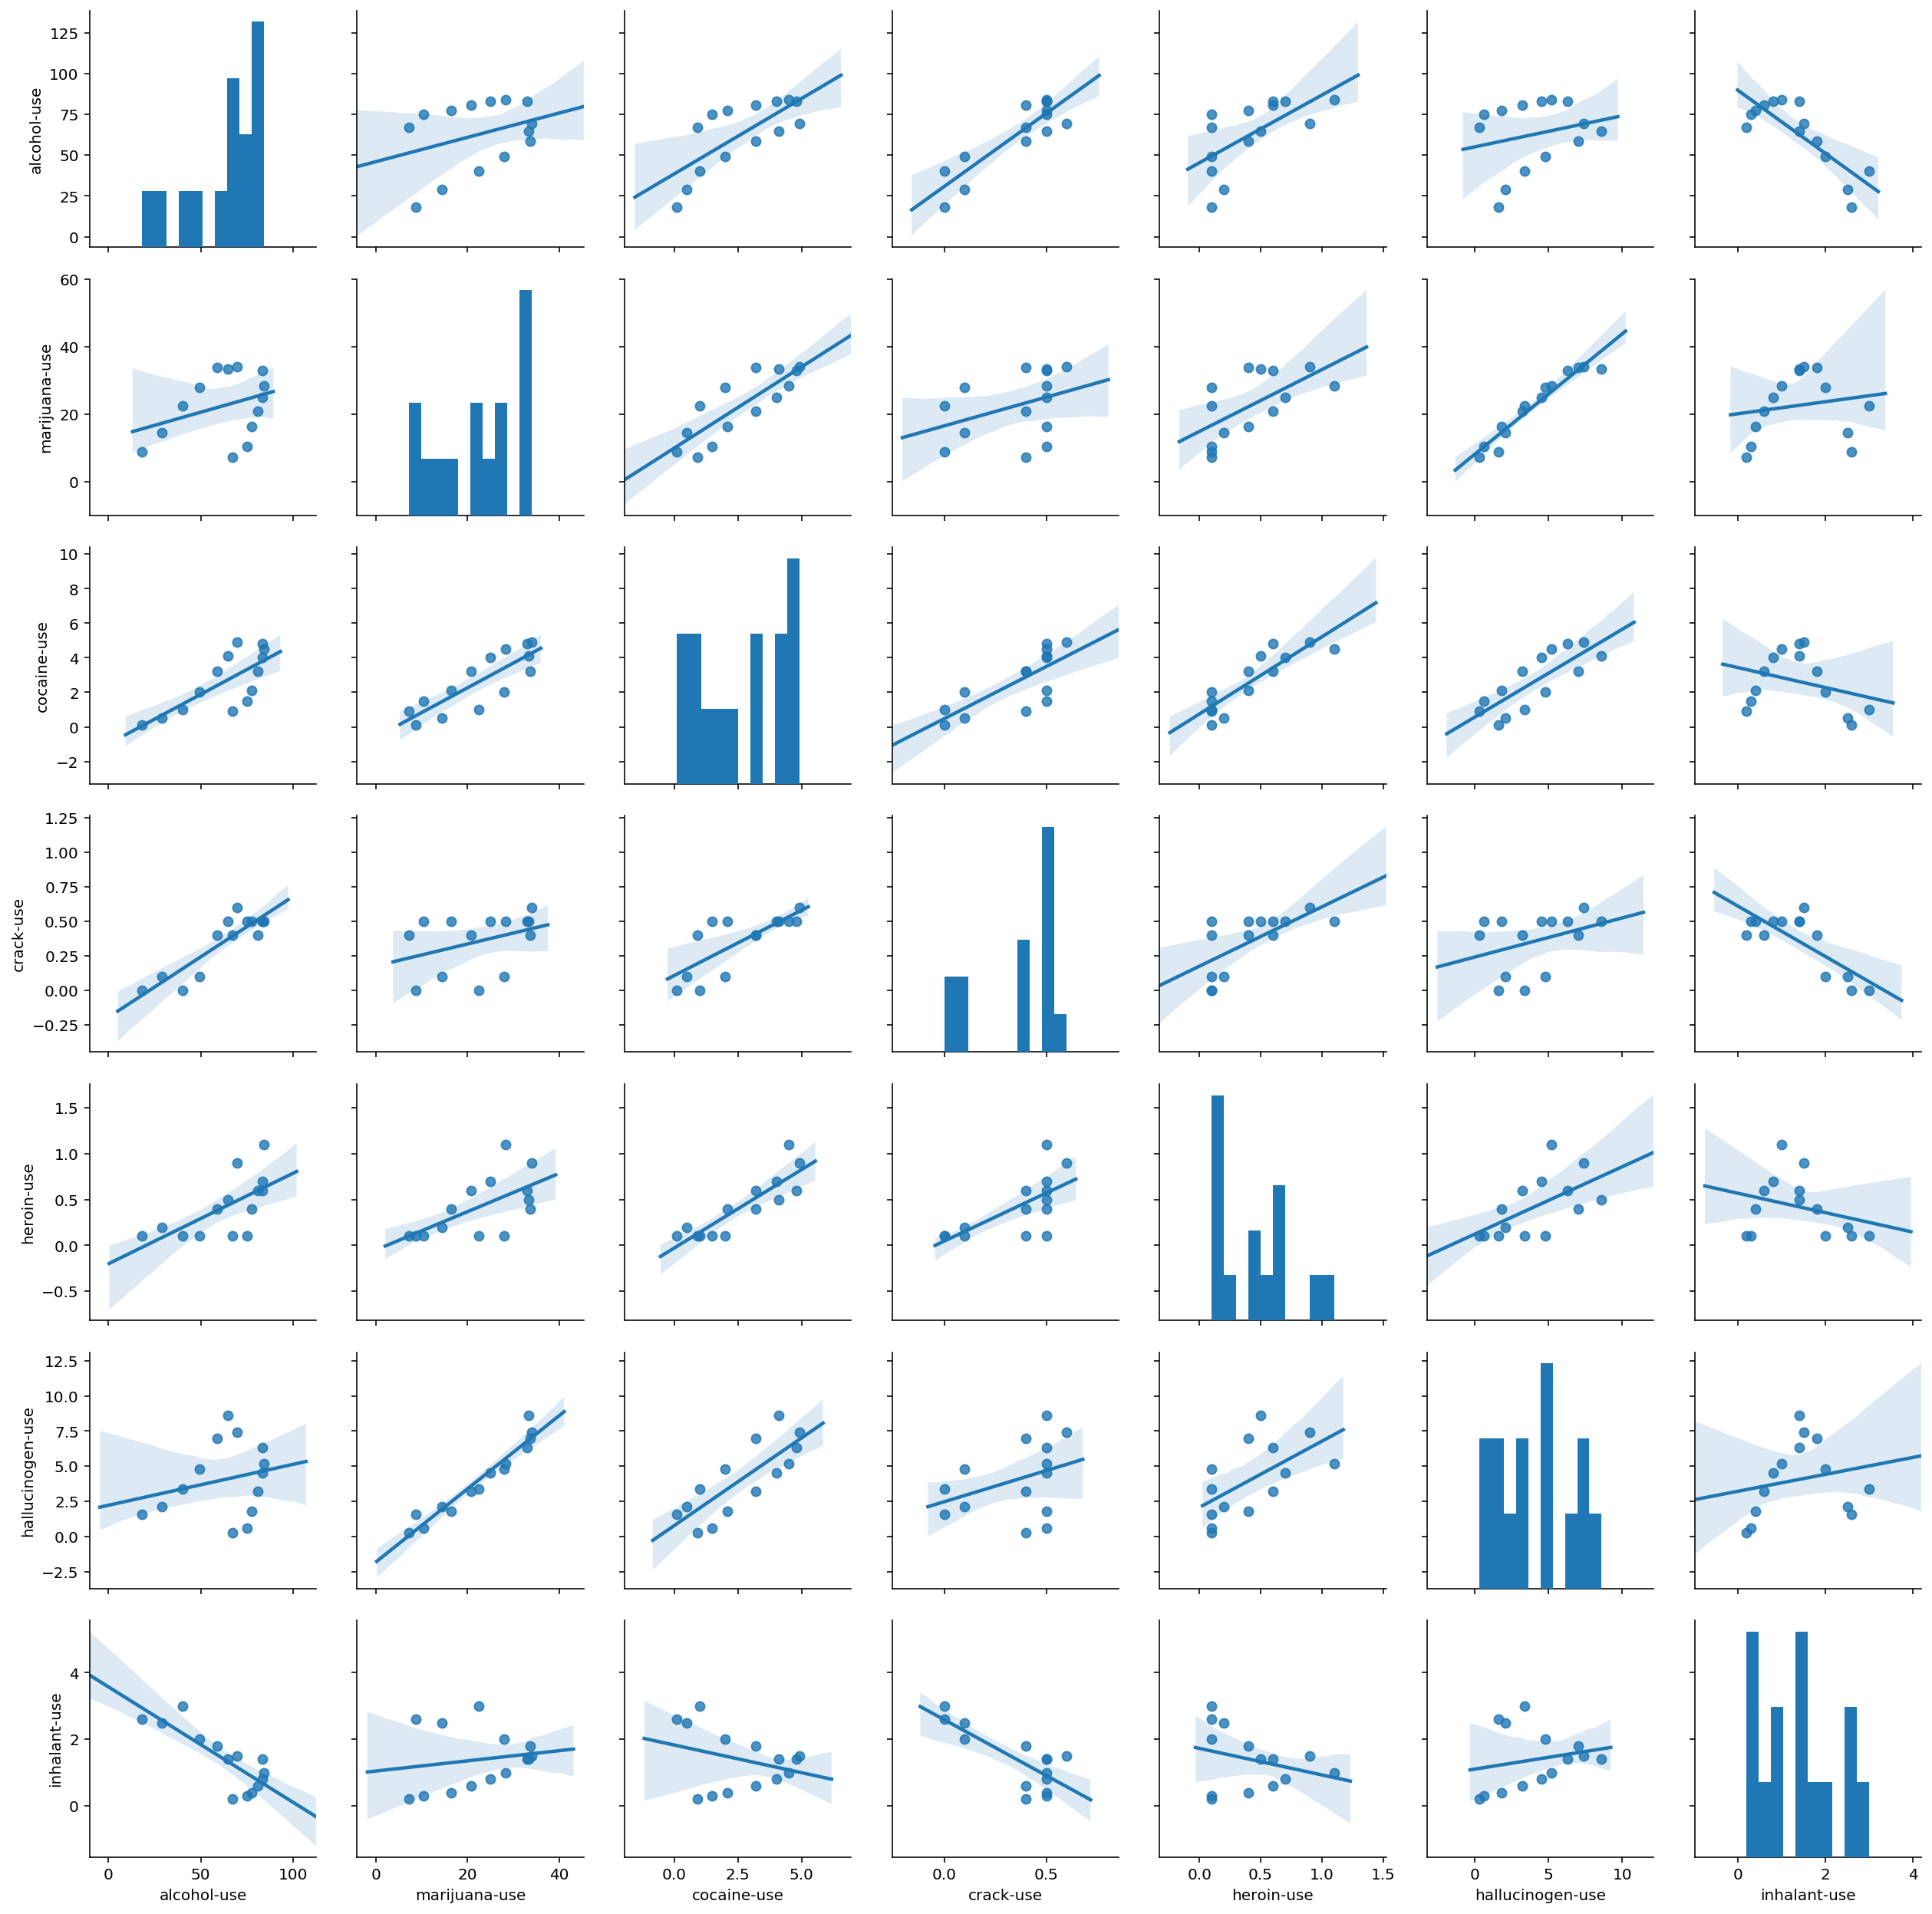

In [141]:
sns.pairplot(drug2_use.loc[:,'age':'inhalant-use'], kind='reg');

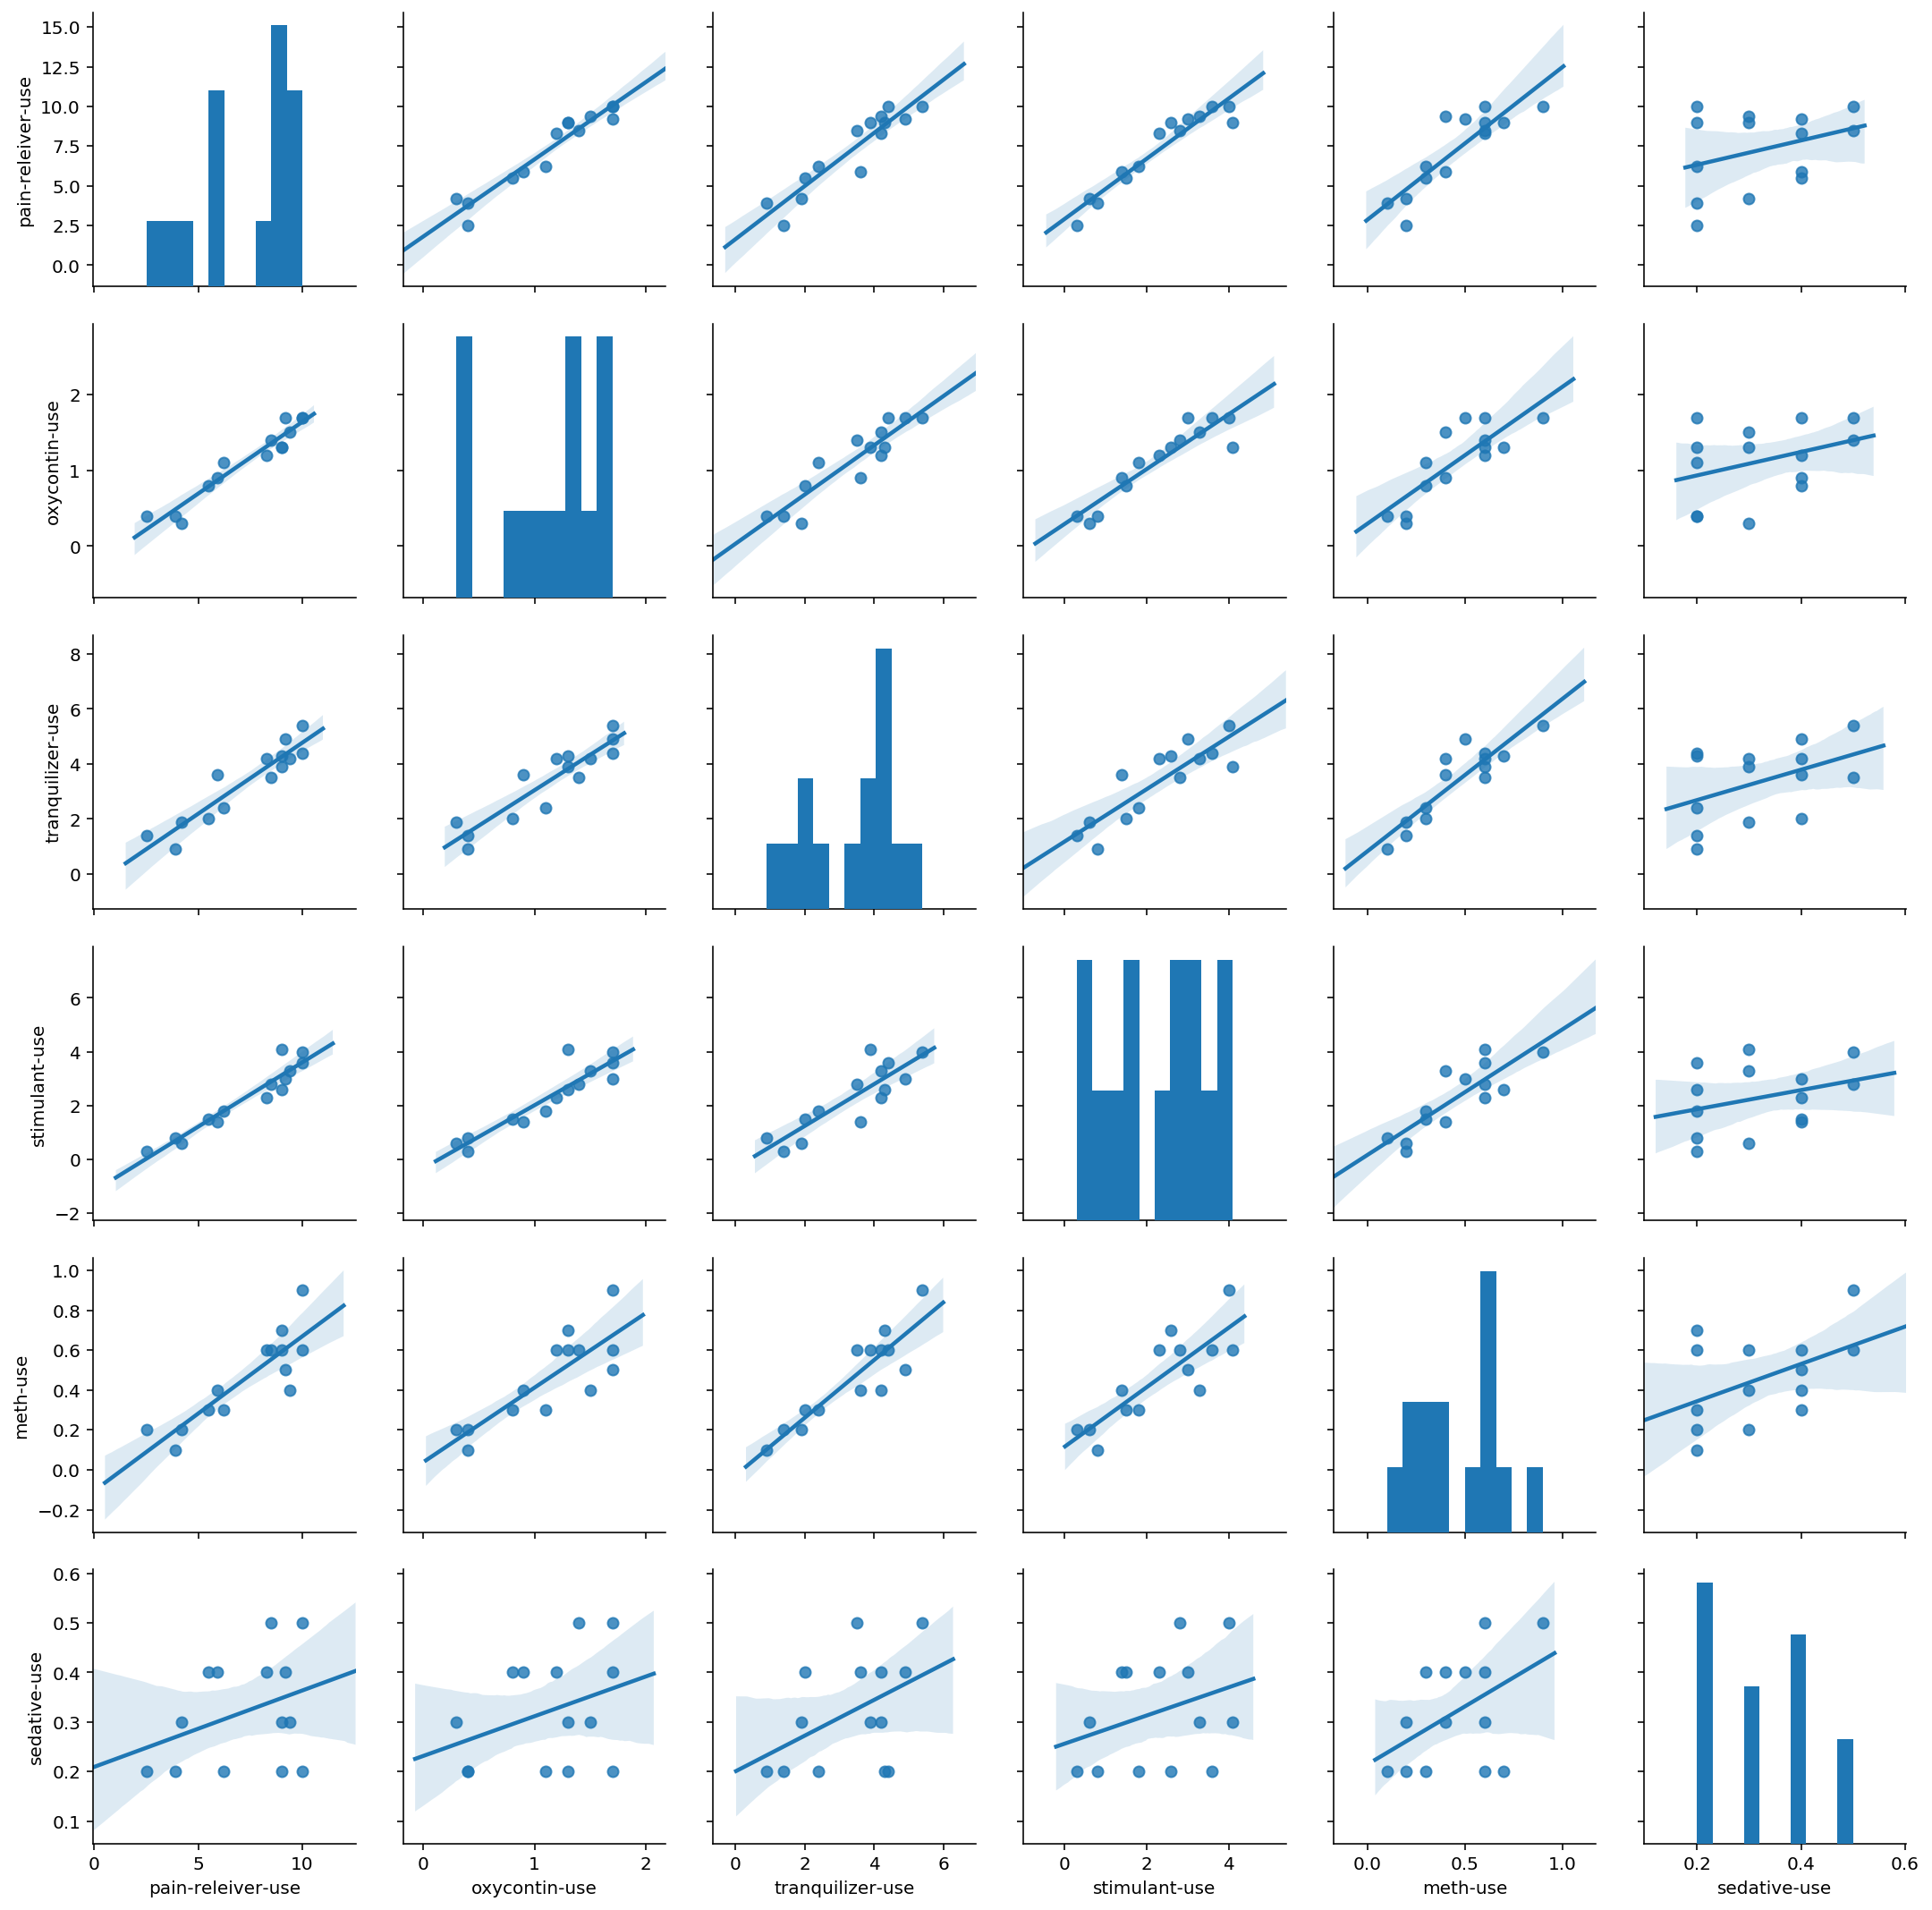

In [142]:
sns.pairplot(drug2_use.loc[:,'pain-releiver-use':'sedative-use'], kind='reg');

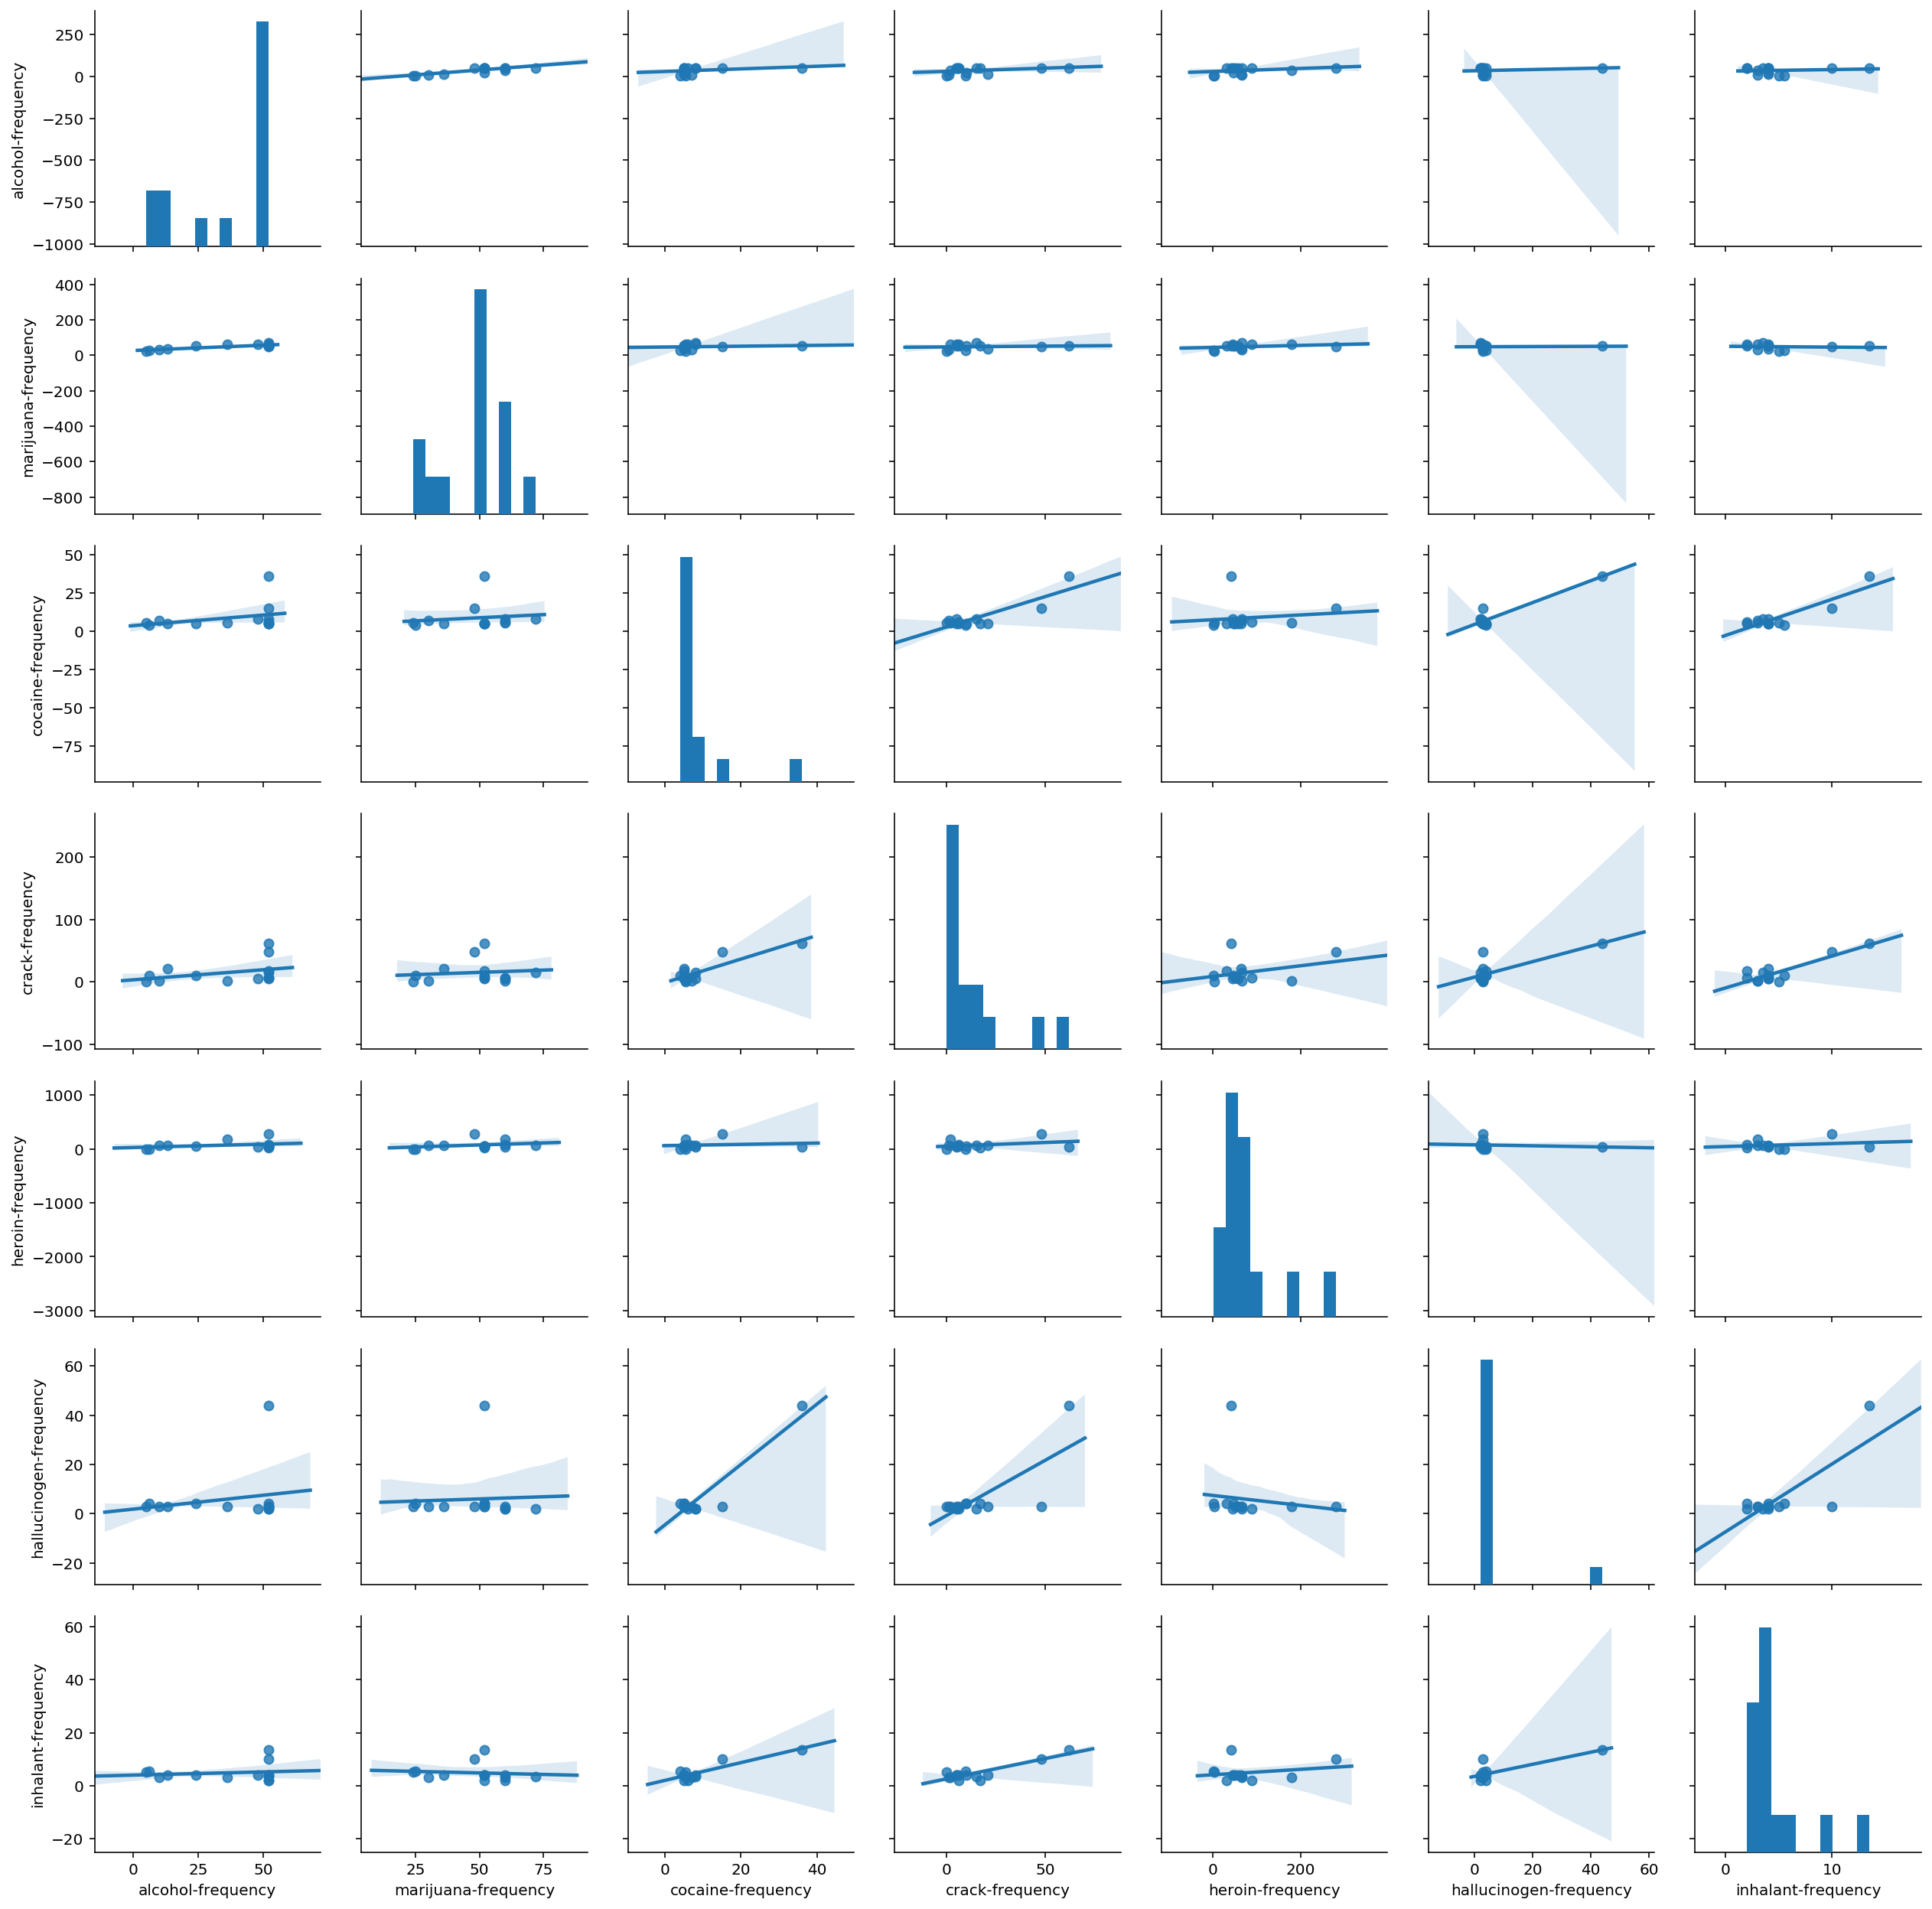

In [143]:
sns.pairplot(drug2_freq.loc[:,'age':'inhalant-frequency'], kind='reg');

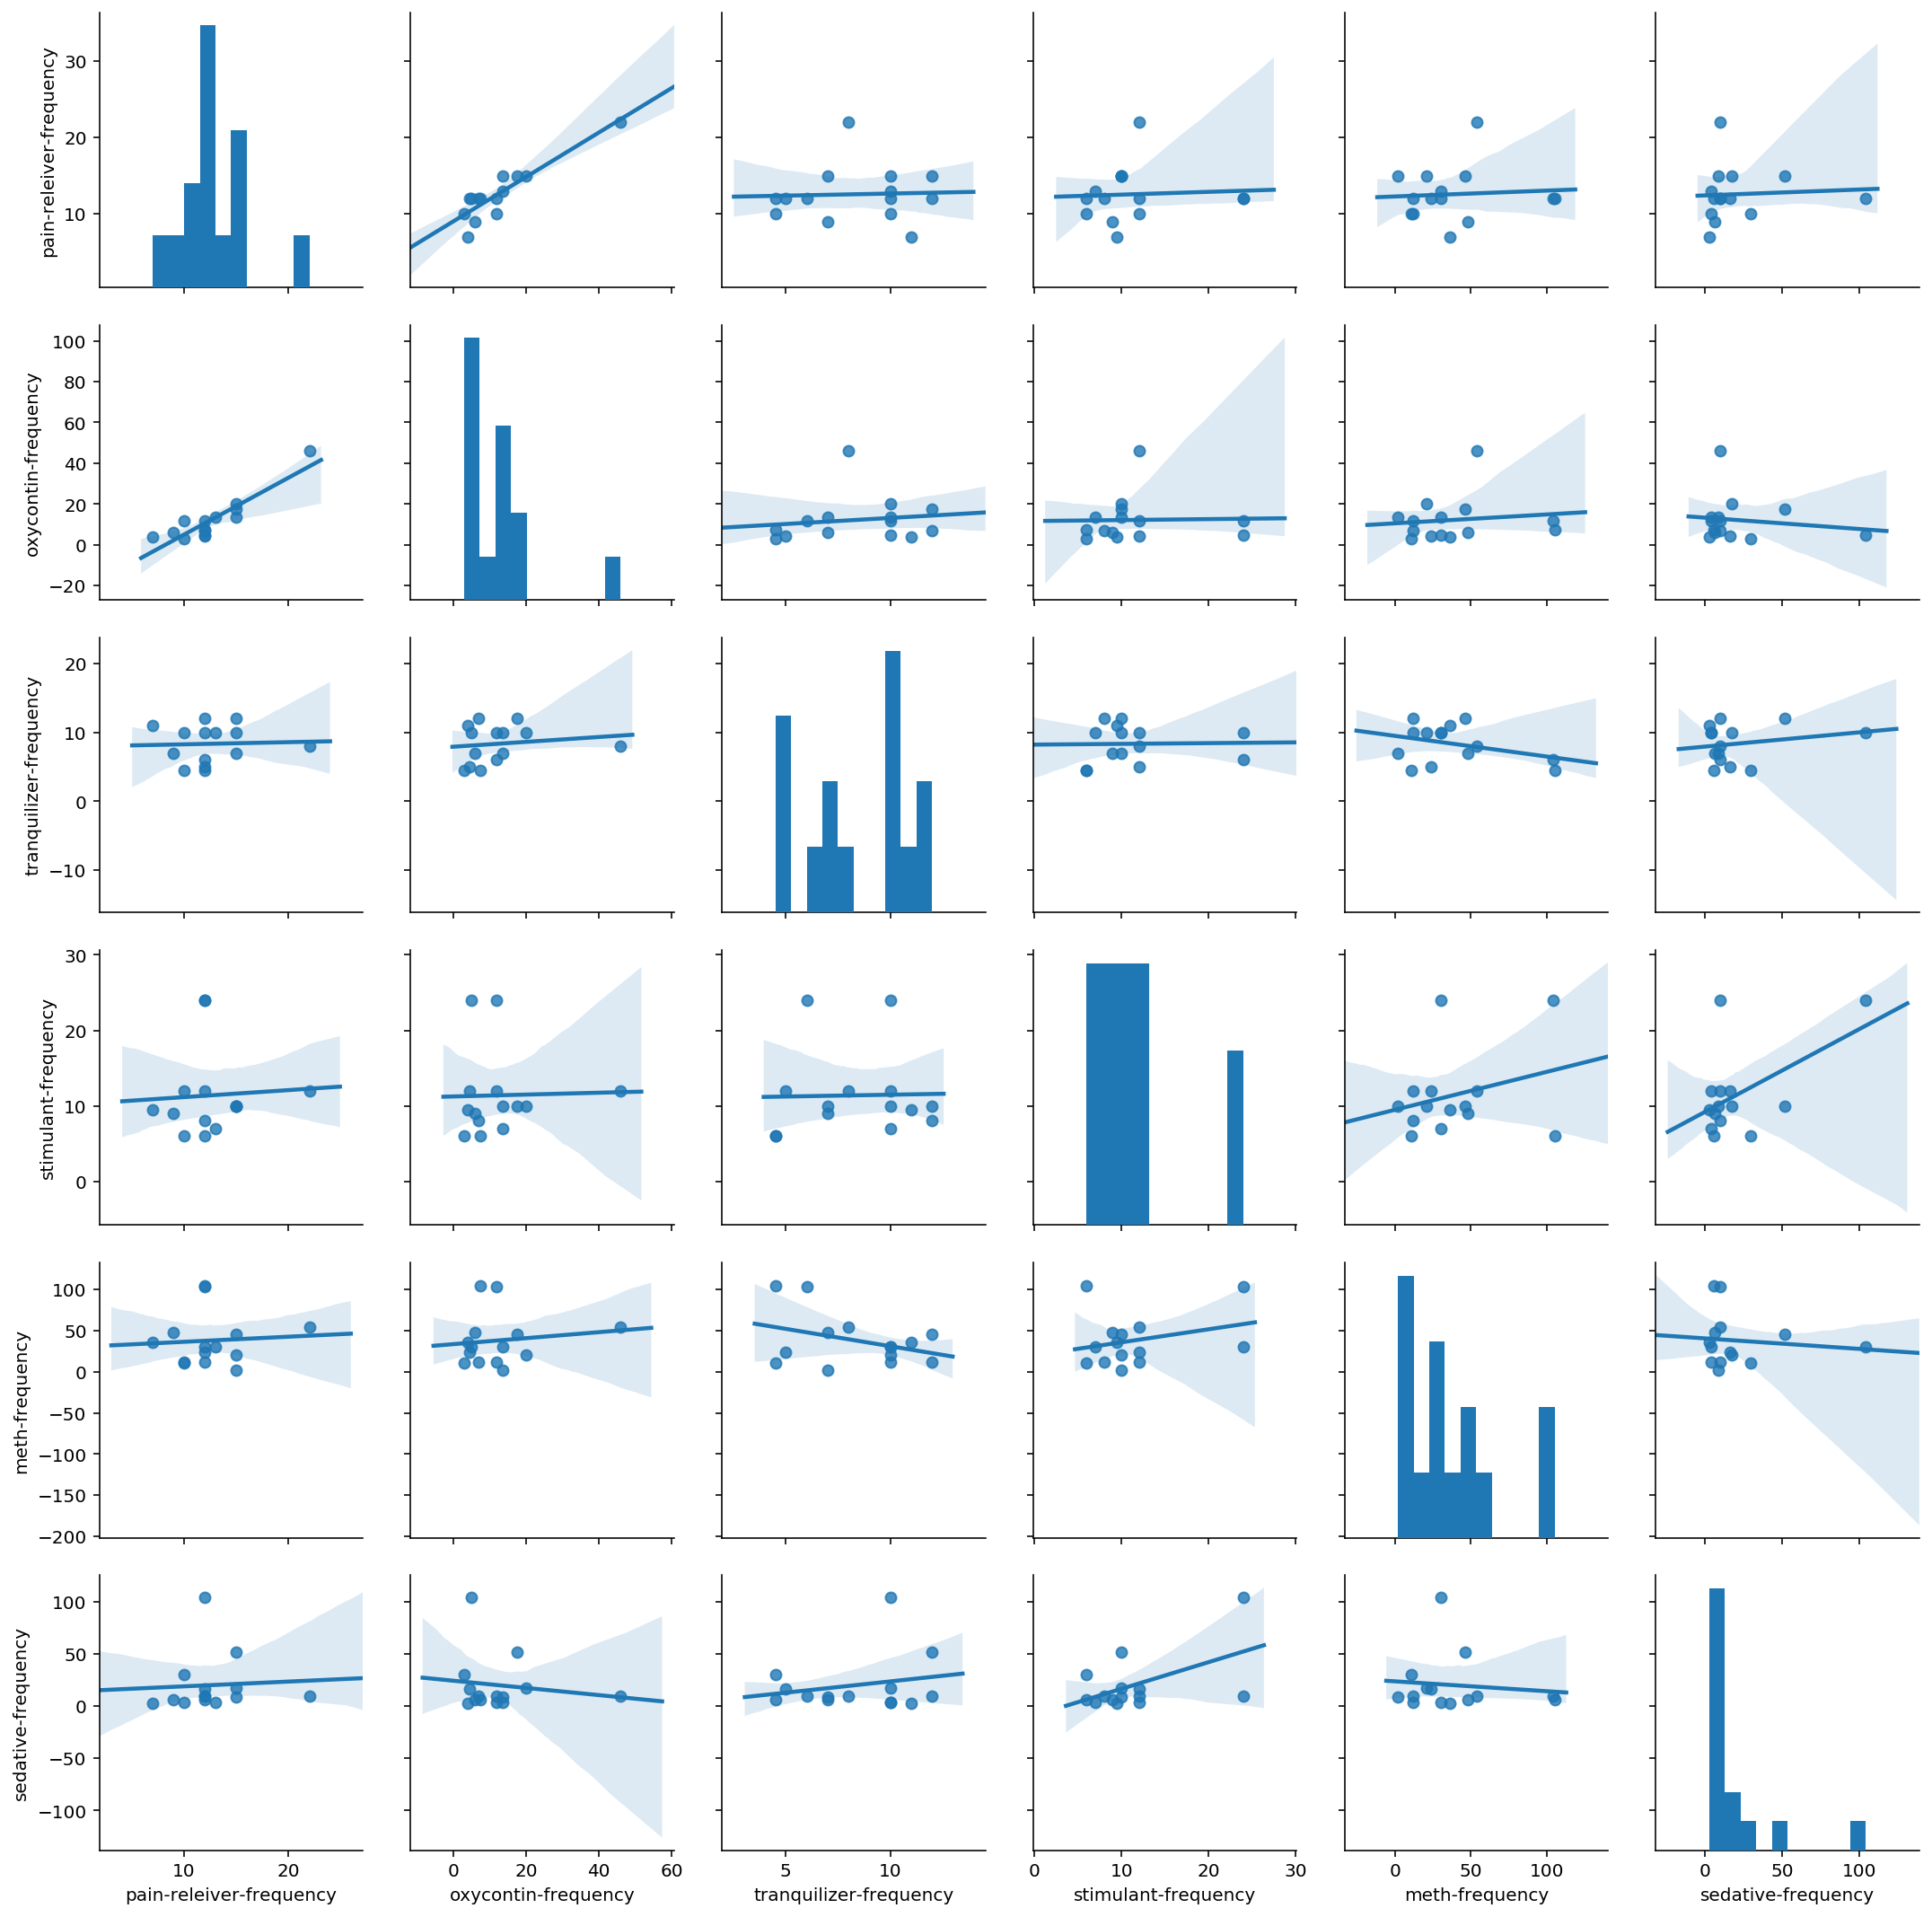

In [144]:
sns.pairplot(drug2_freq.loc[:,'pain-releiver-frequency':'sedative-frequency'], kind='reg');

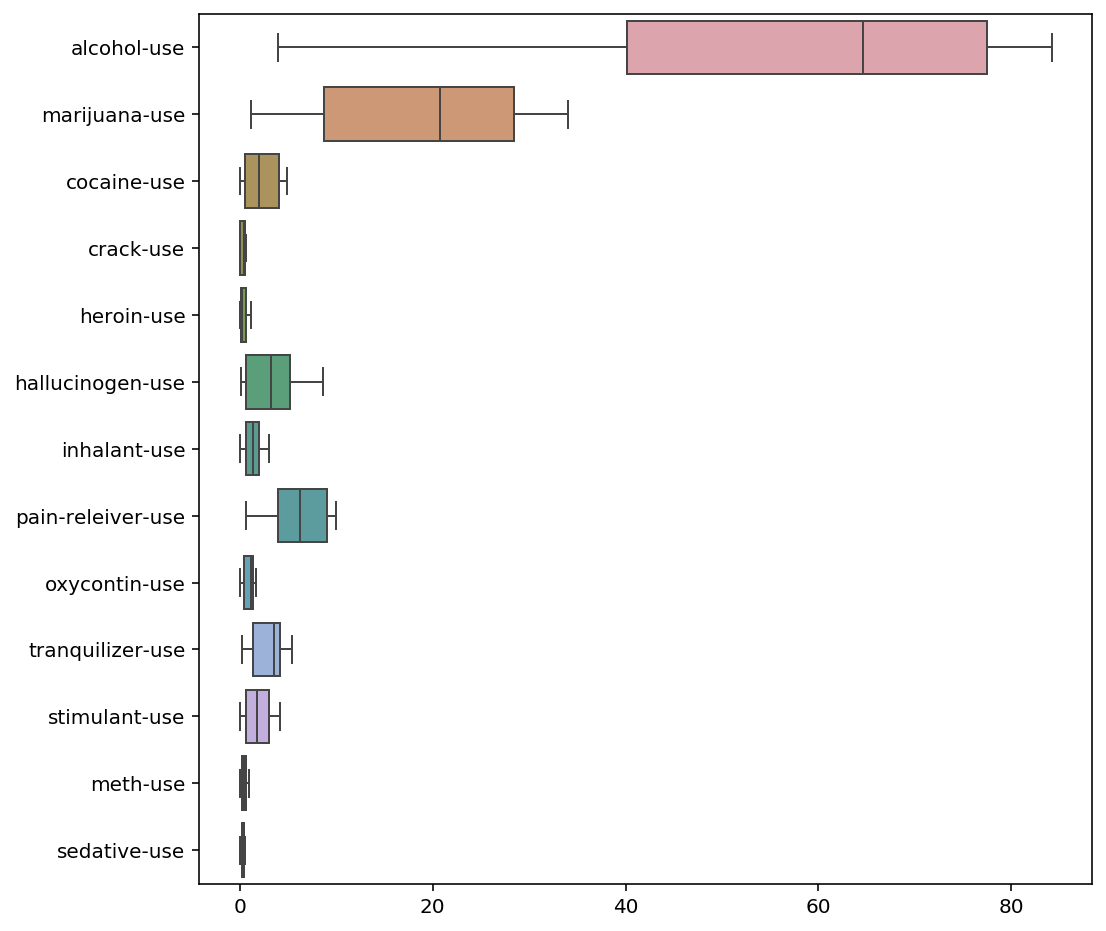

In [145]:
# How about boxplots?

fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=drug_use, orient='h', fliersize=5, linewidth=1, saturation=0.5, ax=ax)
plt.show();

# shows how much larger alcohol consumption and marijuana are vs. the other drugs, both negatively skewed

In [146]:
# Let's standardize so we can see the other distributions properly:

drug_use_stand = drug_use.copy()
drug_use_stand.loc[:,'alcohol-use':] = (drug_use.loc[:,'alcohol-use':] - drug_use.loc[:,'alcohol-use':].mean())
/ drug_use.loc[:,'alcohol-use':].std()

alcohol-use          26.878866
marijuana-use        11.959752
cocaine-use           1.816772
crack-use             0.235772
heroin-use            0.333762
hallucinogen-use      2.792506
inhalant-use          0.927283
pain-releiver-use     3.166379
oxycontin-use         0.608216
tranquilizer-use      1.753379
stimulant-use         1.407673
meth-use              0.262762
sedative-use          0.138000
dtype: float64

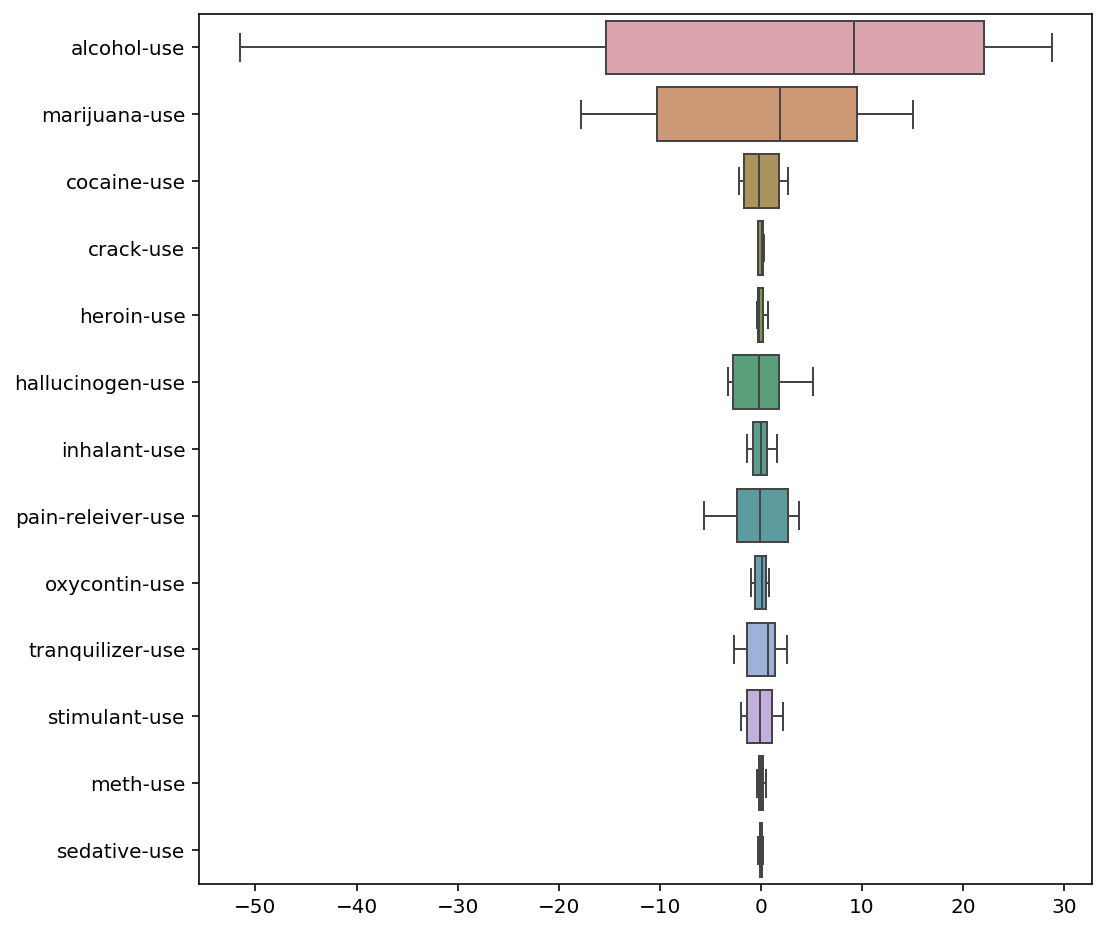

In [147]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=drug_use_stand, orient='h', fliersize=5, linewidth=1, saturation=0.5, ax=ax)
plt.show();

# median to the right of mean for alcohol and marijuana confirming negative skew

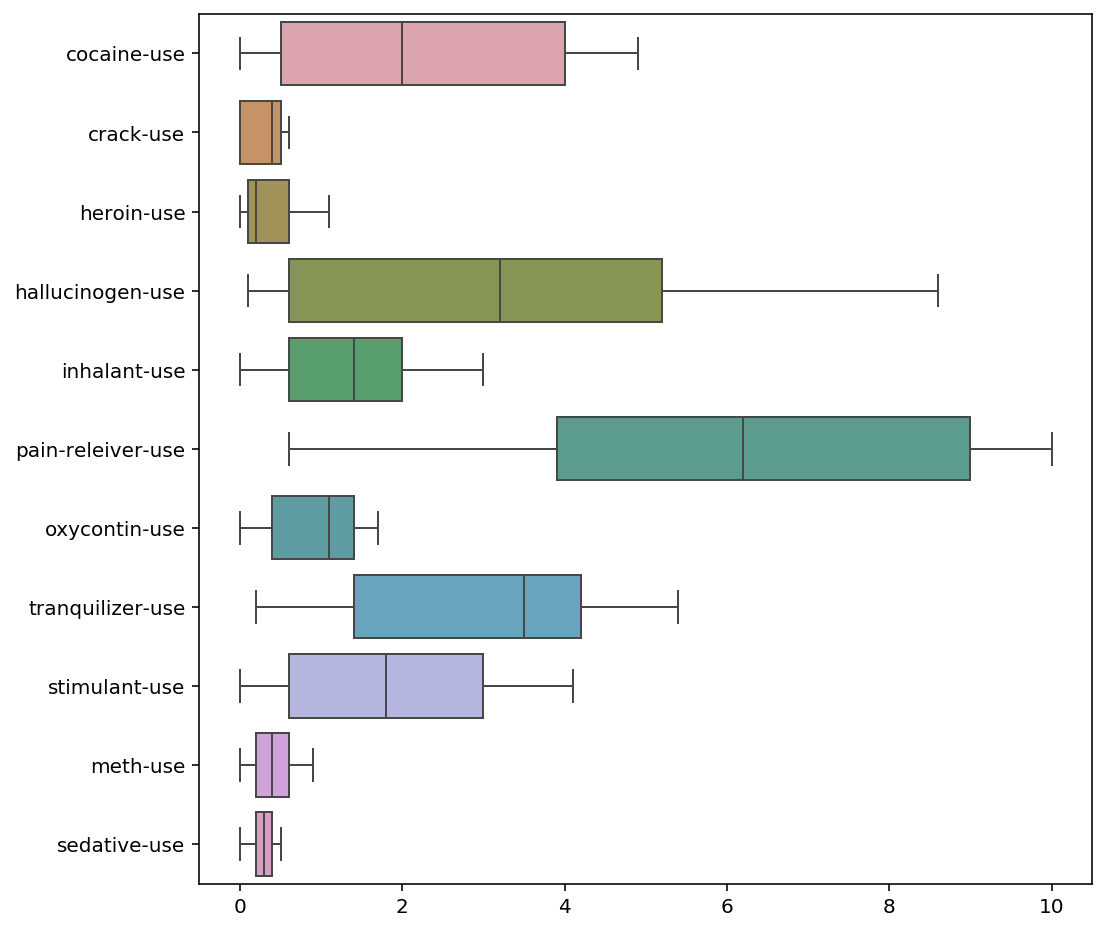

In [148]:
# and now without alcohol amd marijuana, to get a better look at the rest of the plots (change to non-standardized)
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=drug_use.loc[:,'cocaine-use':], orient='h', fliersize=5, linewidth=1, saturation=0.5, ax=ax)
plt.show();

# these %-levels are quite low however, only pain-releivers have median usage > 5% of the sample:

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

I believe that the harder Class A drugs, like Heroin and Crack will display higher levels of addictiveness among
a smaller % of the population than the other non-classified drugs:
    To quantify this means that if heroin was ranked last for usage among different drugs across different ages,
    it would follow that it would be consistently ranked first for frequency vs the other drugs.

To do this I will need to use Spearman's Rank correlation coefficient, after doing a bit of manipulation to get the dataframe into the desired shape

In [63]:
drug = drug.set_index('age')
drug.head()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
age,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,0.0,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [66]:
drug_use = drug_use.set_index('age')
drug_use.head()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
age,,,,,,,,,,,,,
12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


In [72]:
drug_freq = drug_freq.set_index('age')

In [74]:
drug_use.index

Index(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22-23',
       '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype='object', name='age')

In [107]:
drug

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
age,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,0.0,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0


In [131]:
rank_corr = []

for i in drug_use.index:
    # take slice of one age group from each df
    drug_use_i = drug_use.loc[str(i),:].T
    drug_freq_i = drug_freq.loc[str(i),:].T

    # change index names
    drug_use_i.index = ['alcohol', 'marijuana', 'cocaine', 'crack', 'heroin', 'hallucinogen', 'inhalant',
                         'pain-releiver', 'oxycontin', 'tranquilizer', 'stimulant', 'meth', 'sedative']
    drug_freq_i.index = ['alcohol', 'marijuana', 'cocaine', 'crack', 'heroin', 'hallucinogen', 'inhalant',
                          'pain-releiver', 'oxycontin', 'tranquilizer', 'stimulant', 'meth', 'sedative']

    # so that you can concatenate
    drug_i = pd.concat([drug_use_i, drug_freq_i], axis=1)

    # add column names:
    drug_i.columns = ['use','frequency']

    rank_corr.append([str(i),round(drug_i.corr(method='spearman').iloc[0,1],2)])
    
rank_corr = pd.DataFrame(rank_corr, columns = ['age','spearman'])

**Report**



...

In [132]:
# In summary, the Spearman Rank correlations were disappointingly low, and show little relationship between use 
# and frequency across drugs, per age group:

rank_corr

,age,spearman
0,12,0.29
1,13,0.39
2,14,0.25
3,15,0.13
4,16,0.13
5,17,-0.17
6,18,0.17
7,19,0.06
8,20,0.36
9,21,0.28


In [151]:
# There are some age groups that show higher rank correlations, e.g. we take a look at '65+':

drug_use_65 = drug_use.loc[str('65+'),:].T
drug_freq_65 = drug_freq.loc[str('65+'),:].T

# change index names
drug_use_65.index = ['alcohol', 'marijuana', 'cocaine', 'crack', 'heroin', 'hallucinogen', 'inhalant',
                     'pain-releiver', 'oxycontin', 'tranquilizer', 'stimulant', 'meth', 'sedative']
drug_freq_65.index = ['alcohol', 'marijuana', 'cocaine', 'crack', 'heroin', 'hallucinogen', 'inhalant',
                      'pain-releiver', 'oxycontin', 'tranquilizer', 'stimulant', 'meth', 'sedative']

# so that you can concatenate
drug_65 = pd.concat([drug_use_65, drug_freq_65], axis=1)

# add column names:
drug_65.columns = ['use','frequency']

# add ranks:
drug_65['use_rank'] = drug_65[['use']].rank()
drug_65['frequency_rank'] = drug_65[['frequency']].rank()

drug_65

# is alcohol and marijuana skewing the data? it seems that both are ranked highly for use and frequency, and
# therefore break the negative correlation hypothesis because they are much more widely used and accepted by society.

,use,frequency,use_rank,frequency_rank
alcohol,49.3,52.0,13.0,11.0
marijuana,1.2,36.0,12.0,10.0
cocaine,0.0,0.0,4.5,3.0
crack,0.0,0.0,4.5,3.0
heroin,0.0,120.0,4.5,12.0
hallucinogen,0.1,2.0,9.0,6.0
inhalant,0.0,0.0,4.5,3.0
pain-releiver,0.6,24.0,11.0,9.0
oxycontin,0.0,0.0,4.5,3.0
tranquilizer,0.2,5.0,10.0,7.0


In [163]:
# we can repeat this exercise and exclude alcohol and marijuana to see what that gives us:

rank_corr_ex = []

for i in drug_use.index:
    # take slice of one age group from each df
    drug_use_i = drug_use.loc[str(i),'cocaine-use':].T
    drug_freq_i = drug_freq.loc[str(i),'cocaine-frequency':].T

    # change index names
    drug_use_i.index = ['cocaine', 'crack', 'heroin', 'hallucinogen', 'inhalant',
                         'pain-releiver', 'oxycontin', 'tranquilizer', 'stimulant', 'meth', 'sedative']
    drug_freq_i.index = ['cocaine', 'crack', 'heroin', 'hallucinogen', 'inhalant',
                          'pain-releiver', 'oxycontin', 'tranquilizer', 'stimulant', 'meth', 'sedative']

    # so that you can concatenate
    drug_i = pd.concat([drug_use_i, drug_freq_i], axis=1)

    # add column names:
    drug_i.columns = ['use','frequency']

    rank_corr_ex.append([str(i),round(drug_i.corr(method='spearman').iloc[0,1],2)])
    
rank_corr_ex = pd.DataFrame(rank_corr_ex, columns = ['age','spearman_exc'])

In [164]:
rank = pd.concat([rank_corr, rank_corr_ex],axis=1)
rank

# Interestingly, we see that the spearman correlation now shows the negative correlation that I was expecting in most
# of the age groups.

# The data tells us that the supposedly more addictive drugs (as measured by frequency of those that use them)
# are indeed lower in usage on balance, as evidenced by the bias towards negative rank spearman_exc values.
# However the more worrying thing is how 'addictive' the most used drugs are: alcohol and marijuana, which points
# to much wider social acceptance for drugs that can be very addictive.

,age,spearman,age,spearman_exc
0,12,0.29,12,0.58
1,13,0.39,13,0.44
2,14,0.25,14,0.17
3,15,0.13,15,-0.03
4,16,0.13,16,-0.05
5,17,-0.17,17,-0.48
6,18,0.17,18,-0.27
7,19,0.06,19,-0.20
8,20,0.36,20,-0.06
9,21,0.28,21,-0.19


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [116]:
# I have used this knowledge in the answer to 7.3:
# Essentially the Spearman is less retrictive in positively identifying a relationship between two variables
# because it only looks at the strength of the monotonic relationship (one goes up, the other go up?)
# rather than also requiring there be a strong linear relationship between two variables.

# The Spearman is calculated by taking two columns of data, and ranking the numbers in each column with respect to 
# the other numbser in that column. You then take the difference of these two ranks at each row n, square this (d^2),
# and sum them up: then it's = 1 -  6*sum(d^2)/n(n^2 - 1)

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.